<a href="https://colab.research.google.com/github/mariosk97/AI/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os
from tqdm import tqdm
import numpy as np
import cv2
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
classNames = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
classLabels = {classNames:i for i, classNames in enumerate(classNames)}

nb_classes = len(classNames)
IMAGE_SIZE = (150, 150)
print(classLabels)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


Δημιουργία συνάρτησης για να κάνουμε load το dataset

In [ ]:
def LoadDatasets():
  datasets = ['/content/drive/MyDrive/dataset/train', '/content/drive/MyDrive/dataset/test/seg_test']
  output = []

  for dataset in datasets:
    images = []
    labels = []
    print("Loading {}".format(dataset))

    for folder in os.listdir(dataset):
      label = classLabels[folder]

      for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        img_path = os.path.join(os.path.join(dataset, folder), file)

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)

        images.append(image)
        labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    output.append((images, labels))

  return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = LoadDatasets()

Loading /content/drive/MyDrive/dataset/train


100%|██████████| 300/300 [00:03<00:00, 92.86it/s] 


Loading /content/drive/MyDrive/dataset/test/seg_test


100%|██████████| 525/525 [00:07<00:00, 66.66it/s] 


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

Πληροφορίες για τον αριθμό training και test δεδομένων

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1800
Number of testing examples: 3000
Each image is of size: (150, 150)


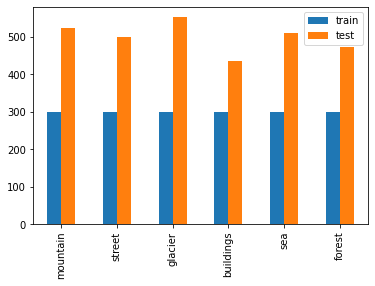

In [ ]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=classNames
            ).plot.bar()
plt.show()

In [ ]:
def display_random_image(classNames, images, labels):


    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + classNames[labels[index]])
    plt.show()

In [ ]:
#train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]*train_images.shape[2])
#test_images = test_images.reshape(test_images.shape[0], test_images.shape[1]*test_images.shape[2])

Scaling ώστε να φαίνονται σωστά οι εικόνες

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Προβολή μιας τυχαίας εικόνας με την κλάση της απο τα training δεδομένα

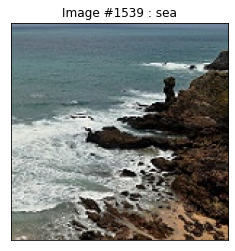

In [ ]:
display_random_image(classNames, train_images, train_labels)

Προβολή τυχαίας εικόνας από τα test δεδομένα

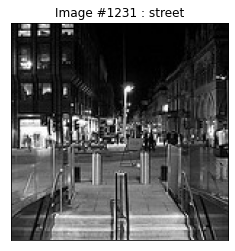

In [ ]:
display_random_image(classNames, test_images, test_labels)

In [ ]:
train_images.shape


(1800, 150, 150, 3)

In [ ]:
#train_images, test_images = train_images.reshape([-1, 22500]), test_images.reshape([-1, 22500])

Ορίζουμε ένα μοντέλο λογιστικής παλινδρόμησης. Ουσιαστικά πρόκειται για ένα ΤΝΔ με έναν μόνο νευρώνα.

In [ ]:
#model = keras.Sequential()
#model.add(layers.Dense(1, activation='sigmoid', input_shape=(train_images.shape[1],)))

In [ ]:
#model.summary()

In [ ]:
#model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01),
              #metrics=["accuracy"])
#model.fit(train_images, train_labels, epochs=20, batch_size=32)

CNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 43s 3s/step - loss: 1.9741 - accuracy: 0.2606
Epoch 2/20
15/15 [==============================] - 42s 3s/step - loss: 1.2341 - accuracy: 0.5067
Epoch 3/20
15/15 [==============================] - 42s 3s/step - loss: 1.0403 - accuracy: 0.6039
Epoch 4/20
15/15 [==============================] - 42s 3s/step - loss: 0.8334 - accuracy: 0.6906
Epoch 5/20
15/15 [==============================] - 42s 3s/step - loss: 0.8355 - accuracy: 0.6817
Epoch 6/20
15/15 [==============================] - 45s 3s/step - loss: 0.6263 - accuracy: 0.7889
Epoch 7/20
15/15 [==============================] - 42s 3s/step - loss: 0.4755 - accuracy: 0.8433
Epoch 8/20
15/15 [==============================] - 43s 3s/step - loss: 0.4416 - accuracy: 0.8550
Epoch 9/20
15/15 [==============================] - 43s 3s/step - loss: 0.3912 - accuracy: 0.8922
Epoch 10/20
15/15 [==============================] - 43s 3s/step - loss: 0.3188 - accuracy: 0.8961
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 20s 207ms/step - loss: 1.3960 - accuracy: 0.6603
Test loss: 1.3959590196609497
Test accuracy: 0.6603333353996277


Μεγαλο accuracy στο training (0,99) αλλά πολύ μικρότερο στο testing (0,64) --> overfitting(?). Επίσης μεγάλη διαφορά και στο loss.

In [ ]:
model = keras.Sequential([
  layers.Flatten(input_shape=(150, 150, 3)),
  layers.Dense(20, activation='relu'),
  layers.Dense(20, activation='relu'),
  layers.Dense(20, activation='relu'),
  layers.Dense(6, activation='softmax')
])

Neural Network

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(150, 150, 3)),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(6, activation = tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
57/57 [==============================] - 2s 19ms/step - loss: 2.7294 - accuracy: 0.2072
Epoch 2/20
57/57 [==============================] - 1s 19ms/step - loss: 1.6544 - accuracy: 0.3044
Epoch 3/20
57/57 [==============================] - 1s 19ms/step - loss: 1.5692 - accuracy: 0.3483
Epoch 4/20
57/57 [==============================] - 1s 18ms/step - loss: 1.4962 - accuracy: 0.3956
Epoch 5/20
57/57 [==============================] - 1s 18ms/step - loss: 1.5826 - accuracy: 0.3356
Epoch 6/20
57/57 [==============================] - 1s 19ms/step - loss: 1.4341 - accuracy: 0.4011
Epoch 7/20
57/57 [==============================] - 1s 19ms/step - loss: 1.4628 - accuracy: 0.3883
Epoch 8/20
57/57 [==============================] - 1s 19ms/step - loss: 1.4141 - accuracy: 0.4194
Epoch 9/20
57/57 [==============================] - 1s 19ms/step - loss: 1.4016 - accuracy: 0.4206
Epoch 10/20
57/57 [==============================] - 1s 18ms/step - loss: 1.3187 - accuracy: 0.4661
Epoch 11/

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 1s 10ms/step - loss: 1.4032 - accuracy: 0.4733
Test loss: 1.403154730796814
Test accuracy: 0.47333332896232605


Το CNN είναι πολύ καλύτερο

CNN με περισσότερα layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 57s 4s/step - loss: 6.9829 - accuracy: 0.2256
Epoch 2/20
15/15 [==============================] - 46s 3s/step - loss: 1.6009 - accuracy: 0.3183
Epoch 3/20
15/15 [==============================] - 46s 3s/step - loss: 1.4383 - accuracy: 0.4028
Epoch 4/20
15/15 [==============================] - 46s 3s/step - loss: 1.3157 - accuracy: 0.4500
Epoch 5/20
15/15 [==============================] - 46s 3s/step - loss: 1.2129 - accuracy: 0.5078
Epoch 6/20
15/15 [==============================] - 46s 3s/step - loss: 1.0970 - accuracy: 0.5739
Epoch 7/20
15/15 [==============================] - 46s 3s/step - loss: 1.1035 - accuracy: 0.5667
Epoch 8/20
15/15 [==============================] - 46s 3s/step - loss: 0.9533 - accuracy: 0.6461
Epoch 9/20
15/15 [==============================] - 46s 3s/step - loss: 0.9436 - accuracy: 0.6328
Epoch 10/20
15/15 [==============================] - 46s 3s/step - loss: 0.9667 - accuracy: 0.6344
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 27s 280ms/step - loss: 1.1632 - accuracy: 0.5920
Test loss: 1.163231611251831
Test accuracy: 0.5920000076293945


Μικρότερο accuracy από το CNN με λιγότερα Layers

Το training φαίνεται να μην έχει πάει καλα (μετά από 7-8+ epochs δεν αυξάνεται η ακρίβεια), οπότε δοκιμάζουμε να μειώνουμε  το learning rate εκθετικά μετά απο 10 εποχές

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20, callbacks=[callback])

Epoch 1/20
15/15 [==============================] - 81s 5s/step - loss: 1.6945 - accuracy: 0.2422 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - 51s 3s/step - loss: 1.3887 - accuracy: 0.4378 - lr: 0.0010
Epoch 3/20
15/15 [==============================] - 51s 3s/step - loss: 1.3836 - accuracy: 0.4350 - lr: 0.0010
Epoch 4/20
15/15 [==============================] - 50s 3s/step - loss: 1.2573 - accuracy: 0.4961 - lr: 0.0010
Epoch 5/20
15/15 [==============================] - 51s 3s/step - loss: 1.1682 - accuracy: 0.5333 - lr: 0.0010
Epoch 6/20
15/15 [==============================] - 51s 3s/step - loss: 1.1545 - accuracy: 0.5356 - lr: 0.0010
Epoch 7/20
15/15 [==============================] - 51s 3s/step - loss: 1.2648 - accuracy: 0.4994 - lr: 0.0010
Epoch 8/20
15/15 [==============================] - 50s 3s/step - loss: 1.1193 - accuracy: 0.5611 - lr: 0.0010
Epoch 9/20
15/15 [==============================] - 51s 3s/step - loss: 1.0320 - accuracy: 0.5806 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 23s 245ms/step - loss: 0.8348 - accuracy: 0.6983
Test loss: 0.8348128199577332
Test accuracy: 0.6983333230018616


Το training παει πολύ καλύτερα, αλλά δεν έχει ολοκληρωθεί. Άρα βάζουμε και άλλα epochs

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=30, callbacks=[callback])

Epoch 1/30
15/15 [==============================] - 55s 4s/step - loss: 1.6844 - accuracy: 0.2322 - lr: 0.0010
Epoch 2/30
15/15 [==============================] - 52s 3s/step - loss: 1.4101 - accuracy: 0.3772 - lr: 0.0010
Epoch 3/30
15/15 [==============================] - 51s 3s/step - loss: 1.2584 - accuracy: 0.4983 - lr: 0.0010
Epoch 4/30
15/15 [==============================] - 51s 3s/step - loss: 1.2747 - accuracy: 0.4533 - lr: 0.0010
Epoch 5/30
15/15 [==============================] - 51s 3s/step - loss: 1.2193 - accuracy: 0.4900 - lr: 0.0010
Epoch 6/30
15/15 [==============================] - 50s 3s/step - loss: 1.1578 - accuracy: 0.5200 - lr: 0.0010
Epoch 7/30
15/15 [==============================] - 50s 3s/step - loss: 1.1175 - accuracy: 0.5344 - lr: 0.0010
Epoch 8/30
15/15 [==============================] - 50s 3s/step - loss: 1.0646 - accuracy: 0.5550 - lr: 0.0010
Epoch 9/30
15/15 [==============================] - 50s 3s/step - loss: 1.0436 - accuracy: 0.5728 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 22s 236ms/step - loss: 0.7897 - accuracy: 0.7070
Test loss: 0.7896580696105957
Test accuracy: 0.7070000171661377


Το training πηγε πολυ καλυτερα. Επίσης η ακρίβεια του test ανέβηκε πολύ

Χωρίς hidden layers

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(150, 150, 3)),
  keras.layers.Dense(6, activation = tf.nn.softmax)
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
              metrics=["accuracy"])


In [ ]:
model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
57/57 [==============================] - 1s 15ms/step - loss: 12.0627 - accuracy: 0.2650
Epoch 2/20
57/57 [==============================] - 1s 14ms/step - loss: 4.0185 - accuracy: 0.3861
Epoch 3/20
57/57 [==============================] - 1s 14ms/step - loss: 2.9320 - accuracy: 0.4406
Epoch 4/20
57/57 [==============================] - 1s 14ms/step - loss: 3.5376 - accuracy: 0.4461
Epoch 5/20
57/57 [==============================] - 1s 14ms/step - loss: 2.9894 - accuracy: 0.5078
Epoch 6/20
57/57 [==============================] - 1s 14ms/step - loss: 2.3206 - accuracy: 0.5183
Epoch 7/20
57/57 [==============================] - 1s 15ms/step - loss: 3.3345 - accuracy: 0.5217
Epoch 8/20
57/57 [==============================] - 1s 14ms/step - loss: 3.2168 - accuracy: 0.5261
Epoch 9/20
57/57 [==============================] - 1s 15ms/step - loss: 2.4229 - accuracy: 0.5950
Epoch 10/20
57/57 [==============================] - 1s 15ms/step - loss: 1.6329 - accuracy: 0.6383
Epoch 11

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 1s 6ms/step - loss: 3.9660 - accuracy: 0.4143
Test loss: 3.966012954711914
Test accuracy: 0.4143333435058594


Το CNN παραμένει το μοντέλο με τη μεγαλύτερη ακρίβεια και το μικρότερο loss

Data augmentation προσπάθειες

Αρχικά ορίζουμε τα augmentation που θα ελέγξουμε

Random Flip Horizontal

In [ ]:
augmentation_random_flip_horizontal = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                   150,
                                  3)),
  ]
)

Random Flip Vertical

In [ ]:
augmentation_random_flip_vertical = keras.Sequential(
  [
    layers.RandomFlip("vertical",
                      input_shape=(150,
                                   150,
                                  3)),
  ]
)

Random Zoom

In [ ]:
augmentation_random_zoom = keras.Sequential(
  [
    layers.RandomZoom(0.2)
  ]
)

Random Rotation

In [ ]:
augmentation_random_rotation = keras.Sequential(
  [
    layers.RandomRotation(0.1)
  ]
)

Radom Translation

In [ ]:
augmentation_random_translation = keras.Sequential(
  [
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
  ]
)

Random Contrast

In [ ]:
augmentation_random_contrast = keras.Sequential(
  [
    layers.RandomContrast(0.1)
  ]
)

Θα ελέγξουμε τον συνδιασμό τους για να προσπαθήσουμε να αυξήσουμε ακόμα περισσότερο την ακρίβεια

In [ ]:
augmentation_random_combination = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1)
  ]
)

Μετά δοκιμάζουμε το κάθε augmentation στις εικόνες μας ώστε να δούμε αν έχει νόημα να το χρησιμοποιήσουμε (δηλαδή να δούμε αν θα βοηθήσει στο training)

Η εικόνα χωρίς τη χρήση κάποιας τενχικής

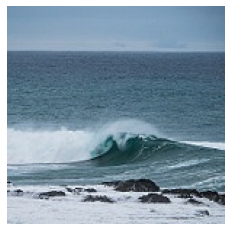

In [ ]:
plt.axis('off')
plt.imshow(train_images[4])

Δοκιμή να φαίνονται δίπλα οι εικόνες

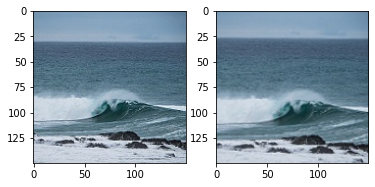

In [ ]:
plt.subplot(1,2,1)
plt.imshow(train_images[4])

plt.subplot(1,2,2)
plt.imshow(augmentation_random_zoom(train_images)[4])

Random Zoom

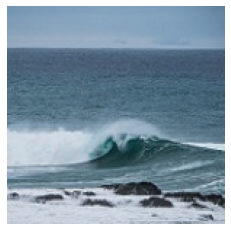

In [ ]:
plt.axis('off')
plt.imshow(augmentation_random_zoom(train_images)[4])

Η χρήση του Random Zoom πιστεύουμε θα βοηθήσει

Random Flip Horizontal

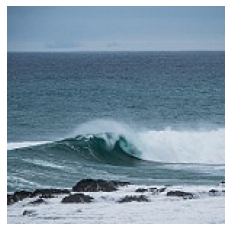

In [ ]:

plt.axis('off')
plt.imshow(augmentation_random_flip_horizontal(train_images)[4])

Η χρήση του Random Flip Horizontal πιστεύουμε θα βοηθήσει

Random Flip Vertical

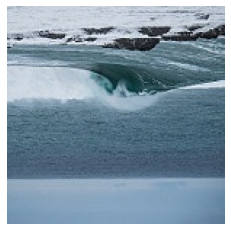

In [ ]:
plt.axis('off')
plt.imshow(augmentation_random_flip_vertical(train_images)[4])

Η χρήση του Random Flip Vertical πιστεύουμε ότι δεν θα βοηθήσει. Αντίθετα θα μειώσει την ακρίβεια γιατί το μοντέλο θα εκπαιδευτεί σε τύπους εικόνων που δεν χρησιμεύουν

Random Rotation

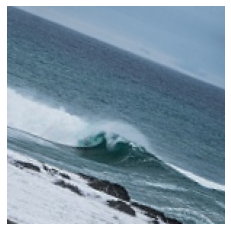

In [ ]:
plt.axis('off')
plt.imshow(augmentation_random_rotation(train_images)[4])

Πιστεύουμε οτι το Random Rotation μπορεί να βοηθήσει αρκεί να μην περιστρέψουμε πολύ τις εικόνες

Random Translation

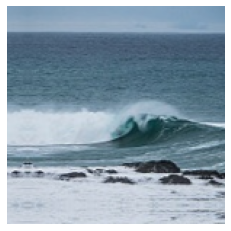

In [ ]:
plt.axis('off')
plt.imshow(augmentation_random_translation(train_images)[4])

Πιστεύουμε οτι το Random Translation μπορεί να βοηθήσει

Random Contrast

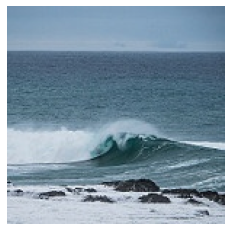

In [ ]:
plt.axis('off')
plt.imshow(augmentation_random_contrast(train_images)[4])

Πιστεύουμε ότι το Random Contrast μπορεί να βοηθήσει

Ελέγχουμε τον συνδιασμό των τεχνικών που πιστεύουμε ότι θα βοηθήσουν

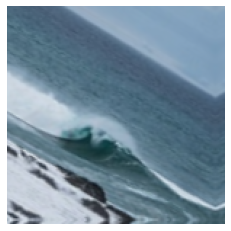

In [ ]:
plt.axis('off')
plt.imshow(augmentation_random_combination(train_images)[4])

Πριν δοκιμάσουμε τον συνδιασμό στο training, ας δούμε αν όλα πάνε καλά χρησιμοποιόντας μονο το random flip horizontal στο CNN

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 39s 3s/step - loss: 1.9989 - accuracy: 0.2506
Epoch 2/20
15/15 [==============================] - 38s 3s/step - loss: 1.2847 - accuracy: 0.4772
Epoch 3/20
15/15 [==============================] - 38s 3s/step - loss: 1.0625 - accuracy: 0.6006
Epoch 4/20
15/15 [==============================] - 38s 3s/step - loss: 0.9609 - accuracy: 0.6117
Epoch 5/20
15/15 [==============================] - 38s 3s/step - loss: 0.8849 - accuracy: 0.6556
Epoch 6/20
15/15 [==============================] - 38s 3s/step - loss: 0.8345 - accuracy: 0.6856
Epoch 7/20
15/15 [==============================] - 38s 3s/step - loss: 0.7116 - accuracy: 0.7261
Epoch 8/20
15/15 [==============================] - 38s 3s/step - loss: 0.6466 - accuracy: 0.7600
Epoch 9/20
15/15 [==============================] - 38s 3s/step - loss: 0.5479 - accuracy: 0.8100
Epoch 10/20
15/15 [==============================] - 38s 3s/step - loss: 0.4611 - accuracy: 0.8339
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 16s 166ms/step - loss: 0.9665 - accuracy: 0.7157
Test loss: 0.9665059447288513
Test accuracy: 0.715666651725769


In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
 5/15 [=========>....................] - ETA: 40s - loss: 3.1892 - accuracy: 0.1516

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Το loss μειώθηκε πολύ (1,47 ->1.02) και το accuracy βελτιώθηκε (0,64 -> 0,69). Άρα η χρήση του random flip horizontal βοήθησε. Ακόμα όπως βλέπουμε μεγάλες διαφορές στα loss και accuracy του training σε σχέση με αυτά του testing

Τώρα  δοκιμάζουμε το flip horizontal στο CNN με τα περισσότερα layers, γιατί είχε καλύτερα αποτελέσματα

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch < 25:
    return lr * tf.math.exp(-0.1)
  else:
    return lr * tf.math.exp(-0.15)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=30, callbacks=[callback])

Epoch 1/30
15/15 [==============================] - 52s 3s/step - loss: 1.6665 - accuracy: 0.3017 - lr: 0.0010
Epoch 2/30
15/15 [==============================] - 53s 4s/step - loss: 1.3805 - accuracy: 0.4461 - lr: 0.0010
Epoch 3/30
15/15 [==============================] - 51s 3s/step - loss: 1.2895 - accuracy: 0.4589 - lr: 0.0010
Epoch 4/30
15/15 [==============================] - 53s 4s/step - loss: 1.2645 - accuracy: 0.5000 - lr: 0.0010
Epoch 5/30
15/15 [==============================] - 51s 3s/step - loss: 1.2510 - accuracy: 0.4889 - lr: 0.0010
Epoch 6/30
15/15 [==============================] - 50s 3s/step - loss: 1.1453 - accuracy: 0.5439 - lr: 0.0010
Epoch 7/30
15/15 [==============================] - 49s 3s/step - loss: 1.0944 - accuracy: 0.5583 - lr: 0.0010
Epoch 8/30
15/15 [==============================] - 50s 3s/step - loss: 1.0859 - accuracy: 0.5600 - lr: 0.0010
Epoch 9/30
15/15 [==============================] - 50s 3s/step - loss: 1.0801 - accuracy: 0.5717 - lr: 0.0010
E

In [ ]:
φscore = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 23s 241ms/step - loss: 0.7387 - accuracy: 0.7310
Test loss: 0.738701343536377
Test accuracy: 0.7310000061988831


Χρειάζεται και άλλο χρόνο για training

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch < 20:
    return lr * tf.math.exp(-0.1)
  else:
    return lr * tf.math.exp(-0.15)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=40, callbacks=[callback])

Epoch 1/40
15/15 [==============================] - 55s 3s/step - loss: 1.7447 - accuracy: 0.2561 - lr: 0.0010
Epoch 2/40
15/15 [==============================] - 50s 3s/step - loss: 1.4226 - accuracy: 0.4022 - lr: 0.0010
Epoch 3/40
15/15 [==============================] - 51s 3s/step - loss: 1.4507 - accuracy: 0.3922 - lr: 0.0010
Epoch 4/40
15/15 [==============================] - 50s 3s/step - loss: 1.2828 - accuracy: 0.4667 - lr: 0.0010
Epoch 5/40
15/15 [==============================] - 49s 3s/step - loss: 1.2727 - accuracy: 0.4817 - lr: 0.0010
Epoch 6/40
15/15 [==============================] - 50s 3s/step - loss: 1.1586 - accuracy: 0.5394 - lr: 0.0010
Epoch 7/40
15/15 [==============================] - 50s 3s/step - loss: 1.1172 - accuracy: 0.5456 - lr: 0.0010
Epoch 8/40
15/15 [==============================] - 51s 3s/step - loss: 1.1505 - accuracy: 0.5422 - lr: 0.0010
Epoch 9/40
15/15 [==============================] - 50s 3s/step - loss: 1.1415 - accuracy: 0.5422 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 23s 242ms/step - loss: 0.7117 - accuracy: 0.7430
Test loss: 0.7116565108299255
Test accuracy: 0.7429999709129333


Φαινεται να χρειαζεται παραπανω epochs γιατι το training παει καλα αλλα δεν εχει ολοκληρωθει

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=60, callbacks=[callback])

Epoch 1/60
15/15 [==============================] - 61s 4s/step - loss: 1.6931 - accuracy: 0.2417 - lr: 0.0010
Epoch 2/60
15/15 [==============================] - 49s 3s/step - loss: 1.3955 - accuracy: 0.3794 - lr: 0.0010
Epoch 3/60
15/15 [==============================] - 49s 3s/step - loss: 1.3365 - accuracy: 0.4439 - lr: 0.0010
Epoch 4/60
15/15 [==============================] - 49s 3s/step - loss: 1.3168 - accuracy: 0.4494 - lr: 0.0010
Epoch 5/60
15/15 [==============================] - 49s 3s/step - loss: 1.1826 - accuracy: 0.5150 - lr: 0.0010
Epoch 6/60
15/15 [==============================] - 49s 3s/step - loss: 1.1320 - accuracy: 0.5572 - lr: 0.0010
Epoch 7/60
15/15 [==============================] - 49s 3s/step - loss: 1.1243 - accuracy: 0.5439 - lr: 0.0010
Epoch 8/60
15/15 [==============================] - 49s 3s/step - loss: 1.0596 - accuracy: 0.5761 - lr: 0.0010
Epoch 9/60
15/15 [==============================] - 49s 3s/step - loss: 1.0247 - accuracy: 0.6033 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 225ms/step - loss: 0.6858 - accuracy: 0.7547
Test loss: 0.6858326196670532
Test accuracy: 0.7546666860580444


Δοκιμάζουμε άλλον scheduler

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=1800//128*1000, #N_TRAIN//BATCH_SIZE*1000
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
optimizer = get_optimizer()

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=60)

Epoch 1/60
15/15 [==============================] - 69s 4s/step - loss: 1.6876 - accuracy: 0.2522
Epoch 2/60
15/15 [==============================] - 49s 3s/step - loss: 1.3833 - accuracy: 0.4300
Epoch 3/60
15/15 [==============================] - 49s 3s/step - loss: 1.3647 - accuracy: 0.4200
Epoch 4/60
15/15 [==============================] - 50s 3s/step - loss: 1.2429 - accuracy: 0.5017
Epoch 5/60
15/15 [==============================] - 49s 3s/step - loss: 1.2668 - accuracy: 0.4889
Epoch 6/60
15/15 [==============================] - 49s 3s/step - loss: 1.1779 - accuracy: 0.5328
Epoch 7/60
15/15 [==============================] - 49s 3s/step - loss: 1.1018 - accuracy: 0.5661
Epoch 8/60
15/15 [==============================] - 49s 3s/step - loss: 1.0333 - accuracy: 0.5944
Epoch 9/60
15/15 [==============================] - 49s 3s/step - loss: 1.0141 - accuracy: 0.5900
Epoch 10/60
15/15 [==============================] - 49s 3s/step - loss: 1.0706 - accuracy: 0.5850
Epoch 11/60
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 221ms/step - loss: 1.0348 - accuracy: 0.7197
Test loss: 1.0347766876220703
Test accuracy: 0.7196666598320007


το training πηγε καλα αλλα υπάρχει overfitting

δοκιμάζουμε dropout και παραπανω epochs

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=65)

Epoch 1/65
15/15 [==============================] - 62s 4s/step - loss: 1.6704 - accuracy: 0.2928
Epoch 2/65
15/15 [==============================] - 48s 3s/step - loss: 1.4844 - accuracy: 0.3861
Epoch 3/65
15/15 [==============================] - 49s 3s/step - loss: 1.3435 - accuracy: 0.4589
Epoch 4/65
15/15 [==============================] - 48s 3s/step - loss: 1.2985 - accuracy: 0.4572
Epoch 5/65
15/15 [==============================] - 49s 3s/step - loss: 1.2330 - accuracy: 0.4939
Epoch 6/65
15/15 [==============================] - 55s 4s/step - loss: 1.1653 - accuracy: 0.5328
Epoch 7/65
15/15 [==============================] - 61s 4s/step - loss: 1.1303 - accuracy: 0.5333
Epoch 8/65
15/15 [==============================] - 49s 3s/step - loss: 1.0861 - accuracy: 0.5633
Epoch 9/65
15/15 [==============================] - 49s 3s/step - loss: 1.1714 - accuracy: 0.5439
Epoch 10/65
15/15 [==============================] - 49s 3s/step - loss: 1.0825 - accuracy: 0.5522
Epoch 11/65
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 23s 244ms/step - loss: 0.7415 - accuracy: 0.7800
Test loss: 0.741452693939209
Test accuracy: 0.7799999713897705


Δοκιμή του augmentation_random_combination στο CNN

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 54s 3s/step - loss: 2.0700 - accuracy: 0.2806
Epoch 2/20
15/15 [==============================] - 63s 4s/step - loss: 1.3180 - accuracy: 0.4539
Epoch 3/20
15/15 [==============================] - 74s 5s/step - loss: 1.3027 - accuracy: 0.4850
Epoch 4/20
15/15 [==============================] - 63s 4s/step - loss: 1.1791 - accuracy: 0.5261
Epoch 5/20
15/15 [==============================] - 53s 4s/step - loss: 1.0881 - accuracy: 0.5739
Epoch 6/20
15/15 [==============================] - 54s 3s/step - loss: 1.1163 - accuracy: 0.5689
Epoch 7/20
15/15 [==============================] - 53s 4s/step - loss: 1.0462 - accuracy: 0.6150
Epoch 8/20
15/15 [==============================] - 56s 4s/step - loss: 1.0424 - accuracy: 0.5989
Epoch 9/20
15/15 [==============================] - 59s 4s/step - loss: 1.0312 - accuracy: 0.5961
Epoch 10/20
15/15 [==============================] - 53s 3s/step - loss: 0.9761 - accuracy: 0.6344
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 20s 214ms/step - loss: 0.8911 - accuracy: 0.6773
Test loss: 0.8911209106445312
Test accuracy: 0.6773333549499512


Πάλι υπάρχει βελτίωση σε σχέση με το αρχικό CNN αλλά το σημαντικότερο είναι ότι υπάρχουν σημαντικές βελτίώσεις από το CNN που χρησιμοποιούσε μόνο το random flip horizontal (1.02 ->0.90, 0.69 -> 0.70). Άρα ο συνδιασμός ήταν σίγουρα καλύτερος από το χρήση μιας μόνο τεχνικής. Τέλος τα loss και accuracy των training και testing είναι πολύ πιο κοντά μεταξύ τους

Το training δεν εχει παει καλα, βαζουμε scheduler

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=30, callbacks=[callback])

Epoch 1/30
 1/15 [=>............................] - ETA: 1:36 - loss: 1.7932 - accuracy: 0.1406

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

random combination στο CNN με περισσοτερα layers και learning rate schedule

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch < 20:
    return lr * tf.math.exp(-0.1)
  else:
    return lr * tf.math.exp(-0.15)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=40, callbacks=[callback])

Epoch 1/40
15/15 [==============================] - 59s 4s/step - loss: 1.7362 - accuracy: 0.2306 - lr: 0.0010
Epoch 2/40
15/15 [==============================] - 59s 4s/step - loss: 1.6758 - accuracy: 0.2839 - lr: 0.0010
Epoch 3/40
15/15 [==============================] - 57s 4s/step - loss: 1.5019 - accuracy: 0.4222 - lr: 0.0010
Epoch 4/40
15/15 [==============================] - 59s 4s/step - loss: 1.3392 - accuracy: 0.4517 - lr: 0.0010
Epoch 5/40
15/15 [==============================] - 57s 4s/step - loss: 1.3217 - accuracy: 0.4361 - lr: 0.0010
Epoch 6/40
15/15 [==============================] - 58s 4s/step - loss: 1.2500 - accuracy: 0.4806 - lr: 0.0010
Epoch 7/40
15/15 [==============================] - 58s 4s/step - loss: 1.1889 - accuracy: 0.5056 - lr: 0.0010
Epoch 8/40
15/15 [==============================] - 57s 4s/step - loss: 1.1932 - accuracy: 0.5033 - lr: 0.0010
Epoch 9/40
15/15 [==============================] - 57s 4s/step - loss: 1.1887 - accuracy: 0.5106 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 34s 359ms/step - loss: 1.0714 - accuracy: 0.6440
Test loss: 1.0714056491851807
Test accuracy: 0.6439999938011169


In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch < 15:
    return lr * tf.math.exp(-0.1)
  elif epoch < 20:
    return lr * tf.math.exp(-0.15)
  elif epoch < 25:
    return lr * tf.math.exp(-0.2)
  elif epoch < 35:
    return lr * tf.math.exp(-0.25)
  elif epoch < 45:
    return lr * tf.math.exp(-0.3)
  else:
    return lr * tf.math.exp(-0.35)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=60, callbacks=[callback])

Epoch 1/60
15/15 [==============================] - 83s 5s/step - loss: 1.7407 - accuracy: 0.2217 - lr: 0.0010
Epoch 2/60
15/15 [==============================] - 61s 4s/step - loss: 1.4839 - accuracy: 0.3856 - lr: 0.0010
Epoch 3/60
15/15 [==============================] - 61s 4s/step - loss: 1.4677 - accuracy: 0.3944 - lr: 0.0010
Epoch 4/60
15/15 [==============================] - 62s 4s/step - loss: 1.3208 - accuracy: 0.4539 - lr: 0.0010
Epoch 5/60
15/15 [==============================] - 60s 4s/step - loss: 1.2273 - accuracy: 0.4822 - lr: 0.0010
Epoch 6/60
15/15 [==============================] - 60s 4s/step - loss: 1.2295 - accuracy: 0.4922 - lr: 0.0010
Epoch 7/60
15/15 [==============================] - 62s 4s/step - loss: 1.2128 - accuracy: 0.5139 - lr: 0.0010
Epoch 8/60
15/15 [==============================] - 59s 4s/step - loss: 1.2109 - accuracy: 0.5122 - lr: 0.0010
Epoch 9/60
15/15 [==============================] - 60s 4s/step - loss: 1.1305 - accuracy: 0.5322 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 23s 239ms/step - loss: 1.3479 - accuracy: 0.5687
Test loss: 1.347888708114624
Test accuracy: 0.5686666369438171


Το training συνεχιζει να μην πηγαινει καλα ακομα και με τη μειωση του learning rate. Δοκιμάζουμε τον optimizer απο το colab του μαθηματος

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=1800//128*1000, #N_TRAIN//BATCH_SIZE*1000
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
optimizer = get_optimizer()

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=40)

Epoch 1/40
15/15 [==============================] - 76s 5s/step - loss: 1.7159 - accuracy: 0.2628
Epoch 2/40
15/15 [==============================] - 66s 4s/step - loss: 1.5220 - accuracy: 0.3244
Epoch 3/40
15/15 [==============================] - 56s 4s/step - loss: 1.3981 - accuracy: 0.4233
Epoch 4/40
15/15 [==============================] - 56s 4s/step - loss: 1.3524 - accuracy: 0.4450
Epoch 5/40
15/15 [==============================] - 56s 4s/step - loss: 1.3180 - accuracy: 0.4606
Epoch 6/40
15/15 [==============================] - 56s 4s/step - loss: 1.2413 - accuracy: 0.4928
Epoch 7/40
15/15 [==============================] - 56s 4s/step - loss: 1.2006 - accuracy: 0.5128
Epoch 8/40
15/15 [==============================] - 56s 4s/step - loss: 1.1430 - accuracy: 0.5294
Epoch 9/40
15/15 [==============================] - 56s 4s/step - loss: 1.1869 - accuracy: 0.5044
Epoch 10/40
15/15 [==============================] - 56s 4s/step - loss: 1.2039 - accuracy: 0.5072
Epoch 11/40
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 22s 227ms/step - loss: 1.2871 - accuracy: 0.5877
Test loss: 1.2871105670928955
Test accuracy: 0.5876666903495789


Το training παει πολυ καλυτερα απο πριν, αλλα δεν εχει ολοκληρωθει. Φαινεται να χρειαζεται παραπανω epochs

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=60)

Epoch 1/60
15/15 [==============================] - 68s 4s/step - loss: 1.7416 - accuracy: 0.2483
Epoch 2/60
15/15 [==============================] - 57s 4s/step - loss: 1.5622 - accuracy: 0.3611
Epoch 3/60
15/15 [==============================] - 56s 4s/step - loss: 1.4517 - accuracy: 0.4100
Epoch 4/60
15/15 [==============================] - 56s 4s/step - loss: 1.3758 - accuracy: 0.4428
Epoch 5/60
15/15 [==============================] - 56s 4s/step - loss: 1.3052 - accuracy: 0.4672
Epoch 6/60
15/15 [==============================] - 55s 4s/step - loss: 1.3064 - accuracy: 0.4850
Epoch 7/60
15/15 [==============================] - 56s 4s/step - loss: 1.2614 - accuracy: 0.4878
Epoch 8/60
15/15 [==============================] - 56s 4s/step - loss: 1.2169 - accuracy: 0.4956
Epoch 9/60
15/15 [==============================] - 55s 4s/step - loss: 1.2440 - accuracy: 0.4900
Epoch 10/60
15/15 [==============================] - 56s 4s/step - loss: 1.1978 - accuracy: 0.5150
Epoch 11/60
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 225ms/step - loss: 1.3485 - accuracy: 0.5470
Test loss: 1.3485486507415771
Test accuracy: 0.546999990940094


Δοκιμή με ακόμα εναν scheduler

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch < 15:
    return lr * tf.math.exp(-0.1)
  elif epoch < 20:
    return lr * tf.math.exp(-0.2)
  elif epoch < 25:
    return lr * tf.math.exp(-0.5)
  elif epoch < 30:
    return lr * tf.math.exp(-0.9)
  elif epoch < 35:
    return lr * tf.math.exp(-1.5)
  elif epoch < 40:
    return lr * tf.math.exp(-2.5)
  elif epoch < 45:
    return lr * tf.math.exp(-3.9)
  elif epoch < 50:
    return lr * tf.math.exp(-6.3)
  elif epoch < 55:
      return lr * tf.math.exp(-9.4)
  else:
    return lr * tf.math.exp(-14.2)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=60, callbacks=[callback])

Epoch 1/60
15/15 [==============================] - 63s 4s/step - loss: 1.7080 - accuracy: 0.2728 - lr: 0.0010
Epoch 2/60
15/15 [==============================] - 61s 4s/step - loss: 1.5029 - accuracy: 0.3906 - lr: 0.0010
Epoch 3/60
15/15 [==============================] - 60s 4s/step - loss: 1.3716 - accuracy: 0.4472 - lr: 0.0010
Epoch 4/60
15/15 [==============================] - 59s 4s/step - loss: 1.3978 - accuracy: 0.4267 - lr: 0.0010
Epoch 5/60
15/15 [==============================] - 58s 4s/step - loss: 1.2641 - accuracy: 0.4944 - lr: 0.0010
Epoch 6/60
15/15 [==============================] - 58s 4s/step - loss: 1.2233 - accuracy: 0.4911 - lr: 0.0010
Epoch 7/60
15/15 [==============================] - 59s 4s/step - loss: 1.2931 - accuracy: 0.4694 - lr: 0.0010
Epoch 8/60
15/15 [==============================] - 59s 4s/step - loss: 1.2396 - accuracy: 0.5011 - lr: 0.0010
Epoch 9/60
15/15 [==============================] - 58s 4s/step - loss: 1.1429 - accuracy: 0.5172 - lr: 0.0010
E

InvalidArgumentError: ignored

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

mexri edo me /255 se scheduler

Το training δεν έχει πάει καλα. Το accuracy φαινεται να αυξάνεται (αργα) και το loss να μειώνεται (και αυτο κάπως αργα). Ίσως αν αυξήσουμε τα epochs αρκετά (πχ 70 ή ακόμα και 80 σύνολο) το training να ολοκηρωθεί, αλλά αρχικά θέλουμε να δούμε αν θα βοηθήσει από ένα σημείο και μετά να μειώνουμε ακόμα περισσότερο το learning rate. Οπότε δοκιμάζουμε διαφορετικό scheduler.

In [ ]:
def bigger_scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch < 20:
    return lr * tf.math.exp(-0.1)
  else:
    return lr * tf.math.exp(-0.15)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(bigger_scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=40, callbacks=[callback])

Epoch 1/40
15/15 [==============================] - 63s 4s/step - loss: 4.8439 - accuracy: 0.1956 - lr: 0.0010
Epoch 2/40
15/15 [==============================] - 61s 4s/step - loss: 1.6150 - accuracy: 0.3467 - lr: 0.0010
Epoch 3/40
15/15 [==============================] - 60s 4s/step - loss: 1.4436 - accuracy: 0.4083 - lr: 0.0010
Epoch 4/40
15/15 [==============================] - 61s 4s/step - loss: 1.3784 - accuracy: 0.4517 - lr: 0.0010
Epoch 5/40
15/15 [==============================] - 59s 4s/step - loss: 1.3189 - accuracy: 0.4689 - lr: 0.0010
Epoch 6/40
15/15 [==============================] - 60s 4s/step - loss: 1.3041 - accuracy: 0.4744 - lr: 0.0010
Epoch 7/40
15/15 [==============================] - 62s 4s/step - loss: 1.2283 - accuracy: 0.5028 - lr: 0.0010
Epoch 8/40
15/15 [==============================] - 61s 4s/step - loss: 1.1931 - accuracy: 0.5139 - lr: 0.0010
Epoch 9/40
15/15 [==============================] - 58s 4s/step - loss: 1.2882 - accuracy: 0.4650 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 22s 237ms/step - loss: 1.0230 - accuracy: 0.6253
Test loss: 1.0229923725128174
Test accuracy: 0.625333309173584


In [ ]:
def biggest_scheduler(epoch, lr):
  if epoch < 10:
    return lr
  elif epoch < 15:
    return lr * tf.math.exp(-0.1)
  elif epoch < 25:
    return lr * tf.math.exp(-0.15)
  else:
    return lr * tf.math.exp(-0.20)


In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(bigger_scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=40, callbacks=[callback])

Epoch 1/40
15/15 [==============================] - 79s 5s/step - loss: 6.9442 - accuracy: 0.2017 - lr: 0.0010
Epoch 2/40
15/15 [==============================] - 60s 4s/step - loss: 1.6961 - accuracy: 0.2678 - lr: 0.0010
Epoch 3/40
15/15 [==============================] - 61s 4s/step - loss: 1.4667 - accuracy: 0.3950 - lr: 0.0010
Epoch 4/40
15/15 [==============================] - 59s 4s/step - loss: 1.3726 - accuracy: 0.4428 - lr: 0.0010
Epoch 5/40
15/15 [==============================] - 63s 4s/step - loss: 1.3132 - accuracy: 0.4794 - lr: 0.0010
Epoch 6/40
15/15 [==============================] - 64s 4s/step - loss: 1.3238 - accuracy: 0.4689 - lr: 0.0010
Epoch 7/40
15/15 [==============================] - 62s 4s/step - loss: 1.2771 - accuracy: 0.4833 - lr: 0.0010
Epoch 8/40
15/15 [==============================] - 63s 4s/step - loss: 1.2516 - accuracy: 0.5006 - lr: 0.0010
Epoch 9/40
15/15 [==============================] - 62s 4s/step - loss: 1.2281 - accuracy: 0.5122 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 226ms/step - loss: 1.3526 - accuracy: 0.5610
Test loss: 1.3526273965835571
Test accuracy: 0.5609999895095825


Συνδιασμός flip, rotate και zoom (χωρίς contrast και translation)

In [ ]:
augmentation_flip_rotate_zoom = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 49s 3s/step - loss: 1.8419 - accuracy: 0.3206
Epoch 2/20
15/15 [==============================] - 48s 3s/step - loss: 1.3601 - accuracy: 0.4839
Epoch 3/20
15/15 [==============================] - 48s 3s/step - loss: 1.2314 - accuracy: 0.5044
Epoch 4/20
15/15 [==============================] - 48s 3s/step - loss: 1.1917 - accuracy: 0.5344
Epoch 5/20
15/15 [==============================] - 48s 3s/step - loss: 1.1171 - accuracy: 0.5639
Epoch 6/20
15/15 [==============================] - 48s 3s/step - loss: 1.0576 - accuracy: 0.5917
Epoch 7/20
15/15 [==============================] - 48s 3s/step - loss: 1.0315 - accuracy: 0.5950
Epoch 8/20
15/15 [==============================] - 48s 3s/step - loss: 1.0213 - accuracy: 0.6083
Epoch 9/20
15/15 [==============================] - 48s 3s/step - loss: 0.9664 - accuracy: 0.6322
Epoch 10/20
15/15 [==============================] - 48s 3s/step - loss: 0.9523 - accuracy: 0.6389
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 194ms/step - loss: 1.0279 - accuracy: 0.6410
Test loss: 1.0279148817062378
Test accuracy: 0.640999972820282


Το training φαινεται να μην εχει ολοκληρωθεί οπότε βάζουμε και άλλα epochs και ξαναεκπαιδευουμε

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=30)

Epoch 1/30
15/15 [==============================] - 51s 3s/step - loss: 2.2923 - accuracy: 0.2722
Epoch 2/30
15/15 [==============================] - 45s 3s/step - loss: 1.4849 - accuracy: 0.4556
Epoch 3/30
15/15 [==============================] - 46s 3s/step - loss: 1.2226 - accuracy: 0.5317
Epoch 4/30
15/15 [==============================] - 46s 3s/step - loss: 1.1986 - accuracy: 0.5311
Epoch 5/30
15/15 [==============================] - 46s 3s/step - loss: 1.1401 - accuracy: 0.5444
Epoch 6/30
15/15 [==============================] - 46s 3s/step - loss: 1.0858 - accuracy: 0.5750
Epoch 7/30
15/15 [==============================] - 46s 3s/step - loss: 1.0351 - accuracy: 0.6022
Epoch 8/30
15/15 [==============================] - 46s 3s/step - loss: 0.9828 - accuracy: 0.6294
Epoch 9/30
15/15 [==============================] - 46s 3s/step - loss: 0.9676 - accuracy: 0.6372
Epoch 10/30
15/15 [==============================] - 46s 3s/step - loss: 0.9895 - accuracy: 0.6117
Epoch 11/30
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 26s 278ms/step - loss: 0.9414 - accuracy: 0.7033
Test loss: 0.9414317011833191
Test accuracy: 0.70333331823349


trekse to kato ksana me /255 + flip,rotate zoom sto cnn me eprisotera layers

In [ ]:
def scheduler(epoch, lr):
  if epoch < 15:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=30, callbacks=[callback])

Epoch 1/30
15/15 [==============================] - 60s 4s/step - loss: 2.2323 - accuracy: 0.3250 - lr: 0.0010
Epoch 2/30
15/15 [==============================] - 48s 3s/step - loss: 1.3885 - accuracy: 0.4528 - lr: 0.0010
Epoch 3/30
15/15 [==============================] - 47s 3s/step - loss: 1.2337 - accuracy: 0.5183 - lr: 0.0010
Epoch 4/30
15/15 [==============================] - 46s 3s/step - loss: 1.1217 - accuracy: 0.5728 - lr: 0.0010
Epoch 5/30
15/15 [==============================] - 48s 3s/step - loss: 1.0911 - accuracy: 0.5783 - lr: 0.0010
Epoch 6/30
15/15 [==============================] - 47s 3s/step - loss: 1.0473 - accuracy: 0.5878 - lr: 0.0010
Epoch 7/30
15/15 [==============================] - 47s 3s/step - loss: 1.0265 - accuracy: 0.6117 - lr: 0.0010
Epoch 8/30
15/15 [==============================] - 47s 3s/step - loss: 1.1037 - accuracy: 0.5722 - lr: 0.0010
Epoch 9/30
15/15 [==============================] - 47s 3s/step - loss: 1.0661 - accuracy: 0.5839 - lr: 0.0010
E

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 19s 199ms/step - loss: 1.1173 - accuracy: 0.6520
Test loss: 1.117308497428894
Test accuracy: 0.6520000100135803


Συνδιασμός flip, rotate, zoom, translation και contrast (δηλαδή όμως το random combination) αλλά με διαφορετικά άνω και κάτω όρια στο contrast και το translation

In [ ]:
augmentation_flip_rotate_zoom_translation_contrast = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
    layers.RandomContrast(0.2)
  ]
)

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom_translation_contrast,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 68s 4s/step - loss: 2.2428 - accuracy: 0.2128
Epoch 2/20
15/15 [==============================] - 73s 5s/step - loss: 1.6012 - accuracy: 0.2828
Epoch 3/20
15/15 [==============================] - 47s 3s/step - loss: 1.5201 - accuracy: 0.3344
Epoch 4/20
15/15 [==============================] - 49s 3s/step - loss: 1.4026 - accuracy: 0.4461
Epoch 5/20
15/15 [==============================] - 48s 3s/step - loss: 1.3346 - accuracy: 0.4561
Epoch 6/20
15/15 [==============================] - 48s 3s/step - loss: 1.2438 - accuracy: 0.5044
Epoch 7/20
15/15 [==============================] - 48s 3s/step - loss: 1.2532 - accuracy: 0.4944
Epoch 8/20
15/15 [==============================] - 47s 3s/step - loss: 1.2080 - accuracy: 0.5283
Epoch 9/20
15/15 [==============================] - 47s 3s/step - loss: 1.1841 - accuracy: 0.5417
Epoch 10/20
15/15 [==============================] - 47s 3s/step - loss: 1.1965 - accuracy: 0.5172
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 19s 196ms/step - loss: 1.1780 - accuracy: 0.5617
Test loss: 1.1780458688735962
Test accuracy: 0.5616666674613953


Το accuracy sto test set έπεσε σε σχέση με πριν.

Συνδιασμός flip, rotate, zoom και contrast

In [ ]:
augmentation_flip_rotate_zoom_contrast = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
  ]
)

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom_contrast,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 52s 3s/step - loss: 2.4590 - accuracy: 0.1894
Epoch 2/20
15/15 [==============================] - 57s 4s/step - loss: 1.6570 - accuracy: 0.3000
Epoch 3/20
15/15 [==============================] - 56s 4s/step - loss: 1.4521 - accuracy: 0.3750
Epoch 4/20
15/15 [==============================] - 45s 3s/step - loss: 1.3616 - accuracy: 0.4272
Epoch 5/20
15/15 [==============================] - 46s 3s/step - loss: 1.3013 - accuracy: 0.4728
Epoch 6/20
15/15 [==============================] - 45s 3s/step - loss: 1.1894 - accuracy: 0.5083
Epoch 7/20
15/15 [==============================] - 46s 3s/step - loss: 1.1797 - accuracy: 0.5333
Epoch 8/20
15/15 [==============================] - 45s 3s/step - loss: 1.2038 - accuracy: 0.5022
Epoch 9/20
15/15 [==============================] - 46s 3s/step - loss: 1.2060 - accuracy: 0.5389
Epoch 10/20
15/15 [==============================] - 45s 3s/step - loss: 1.1224 - accuracy: 0.5667
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 187ms/step - loss: 1.2832 - accuracy: 0.5523
Test loss: 1.2832365036010742
Test accuracy: 0.5523333549499512


In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom_contrast,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=35)

Epoch 1/35
15/15 [==============================] - 51s 3s/step - loss: 376.4680 - accuracy: 0.1739
Epoch 2/35
15/15 [==============================] - 44s 3s/step - loss: 2.2461 - accuracy: 0.2894
Epoch 3/35
15/15 [==============================] - 44s 3s/step - loss: 1.7059 - accuracy: 0.3089
Epoch 4/35
15/15 [==============================] - 43s 3s/step - loss: 1.6712 - accuracy: 0.3428
Epoch 5/35
15/15 [==============================] - 45s 3s/step - loss: 1.6103 - accuracy: 0.3400
Epoch 6/35
15/15 [==============================] - 44s 3s/step - loss: 1.5574 - accuracy: 0.3739
Epoch 7/35
15/15 [==============================] - 44s 3s/step - loss: 1.5118 - accuracy: 0.3772
Epoch 8/35
15/15 [==============================] - 44s 3s/step - loss: 1.4630 - accuracy: 0.4344
Epoch 9/35
15/15 [==============================] - 43s 3s/step - loss: 1.4256 - accuracy: 0.4211
Epoch 10/35
15/15 [==============================] - 43s 3s/step - loss: 1.3928 - accuracy: 0.4389
Epoch 11/35
15/15

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 19s 193ms/step - loss: 1.3161 - accuracy: 0.5180
Test loss: 1.3160984516143799
Test accuracy: 0.5180000066757202


Δοκιμή flip horizontal στο neural network

In [ ]:
model = keras.Sequential([
  augmentation_random_flip_horizontal,
  keras.layers.Flatten(input_shape=(150, 150, 3)),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(6, activation = tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
57/57 [==============================] - 3s 32ms/step - loss: 2.4115 - accuracy: 0.1811
Epoch 2/20
57/57 [==============================] - 2s 31ms/step - loss: 1.7981 - accuracy: 0.2000
Epoch 3/20
57/57 [==============================] - 2s 31ms/step - loss: 1.7589 - accuracy: 0.2444
Epoch 4/20
57/57 [==============================] - 2s 31ms/step - loss: 1.7197 - accuracy: 0.3089
Epoch 5/20
57/57 [==============================] - 2s 31ms/step - loss: 1.6762 - accuracy: 0.3167
Epoch 6/20
57/57 [==============================] - 2s 32ms/step - loss: 1.6121 - accuracy: 0.3333
Epoch 7/20
57/57 [==============================] - 2s 31ms/step - loss: 1.5769 - accuracy: 0.3578
Epoch 8/20
57/57 [==============================] - 2s 31ms/step - loss: 1.5861 - accuracy: 0.3444
Epoch 9/20
57/57 [==============================] - 2s 31ms/step - loss: 1.5576 - accuracy: 0.3522
Epoch 10/20
57/57 [==============================] - 2s 31ms/step - loss: 1.6102 - accuracy: 0.3611
Epoch 11/

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 1s 6ms/step - loss: 1.4980 - accuracy: 0.3683
Test loss: 1.4980231523513794
Test accuracy: 0.3683333396911621


Δοκιμή flip,rotate,zoom στο neural network

In [ ]:
model = keras.Sequential([
  augmentation_flip_rotate_zoom,
  keras.layers.Flatten(input_shape=(150, 150, 3)),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(20, activation = tf.nn.relu),
  keras.layers.Dense(6, activation = tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=20, batch_size=32)

Epoch 1/20
57/57 [==============================] - 8s 129ms/step - loss: 2.0205 - accuracy: 0.1972
Epoch 2/20
57/57 [==============================] - 8s 145ms/step - loss: 1.7306 - accuracy: 0.2611
Epoch 3/20
57/57 [==============================] - 7s 127ms/step - loss: 1.6743 - accuracy: 0.2633
Epoch 4/20
57/57 [==============================] - 7s 128ms/step - loss: 1.6561 - accuracy: 0.2811
Epoch 5/20
57/57 [==============================] - 7s 128ms/step - loss: 1.6347 - accuracy: 0.2806
Epoch 6/20
57/57 [==============================] - 7s 127ms/step - loss: 1.5949 - accuracy: 0.3044
Epoch 7/20
57/57 [==============================] - 7s 127ms/step - loss: 1.5806 - accuracy: 0.3150
Epoch 8/20
57/57 [==============================] - 7s 127ms/step - loss: 1.6667 - accuracy: 0.2833
Epoch 9/20
57/57 [==============================] - 7s 128ms/step - loss: 1.5895 - accuracy: 0.3133
Epoch 10/20
57/57 [==============================] - 7s 127ms/step - loss: 1.5454 - accuracy: 0.3378

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 1s 6ms/step - loss: 1.5189 - accuracy: 0.3653
Test loss: 1.5188733339309692
Test accuracy: 0.36533331871032715


Χρήση των tf.Image τεχνικών

Πρέπει να γίνει load το dataset με διαφορετικό τρόπο ώστε να μπορούμε να κάνουμε map τις augmentation τεχνικες στο training set

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset/train',
  seed=123,
  image_size=(150, 150)
)

Found 1800 files belonging to 6 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset/test/seg_test',
  seed=123,
  image_size=(150, 150)
)

Found 3000 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


Έλεγχος αν έχει γίνει σωστά load με την προβολή εικόνων

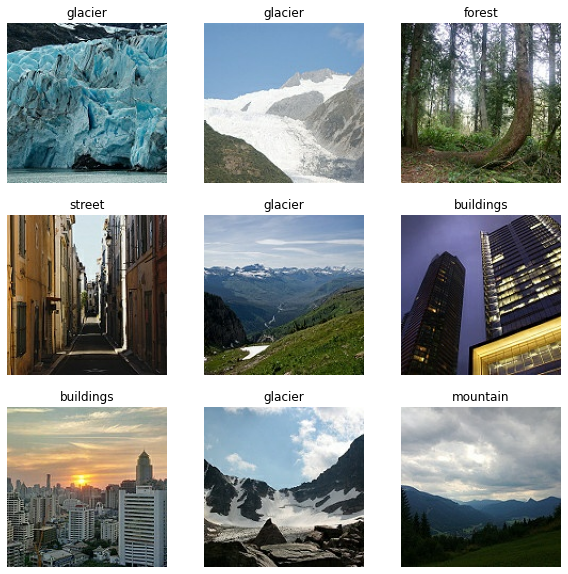

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Δοκιμή τεχνικής αλλαγή hue

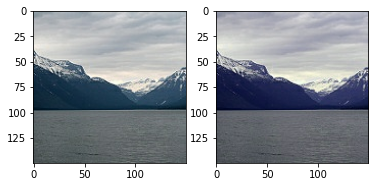

In [ ]:
for image, label in train_ds.take(1):
  plt.subplot(1,2,1)
  plt.imshow(image[0].numpy().astype("uint8"))

  plt.subplot(1,2,2)
  plt.imshow(tf.image.stateless_random_hue(
    image[0].numpy().astype("uint8"), 0.1, seed = (1, 2)
  ))

Δοκιμή τεχνικής flip left right

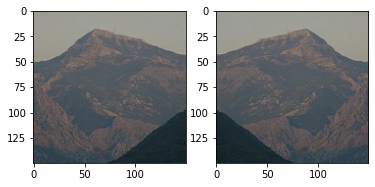

In [ ]:
for image, label in train_ds.take(1):
  plt.subplot(1,2,1)
  plt.imshow(image[0].numpy().astype("uint8"))

  plt.subplot(1,2,2)
  plt.imshow(tf.image.stateless_random_flip_left_right(
    image[0].numpy().astype("uint8"), seed = (2, 3)
  ))

Δοκιμή αλλαγής brightness

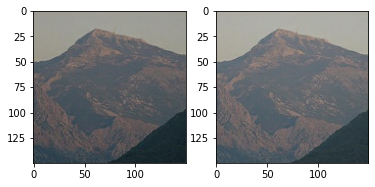

In [ ]:
for image, label in train_ds.take(1):
  plt.subplot(1,2,1)
  plt.imshow(image[0].numpy().astype("uint8"))

  plt.subplot(1,2,2)
  plt.imshow(tf.image.stateless_random_brightness(
      image[0].numpy().astype("uint8"), max_delta=0.1, seed = (1, 2)
))

Η συνάρτηση που θα γίνει map στο training set. Αλλάζει το hue

In [ ]:
def augment(image_label, seed):
  image, label = image_label

  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]

  image = tf.image.stateless_random_hue(
    image, 0.1, new_seed
  )

  return image, label

In [ ]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [150, 150])
  image = (image / 255.0)
  return image, label

flip left right

In [ ]:
def augment2(image_label, seed):
  image, label = image_label
  #image, label = resize_and_rescale(image, label)
  #image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_flip_left_right(
    image, new_seed
  )
  # Random brightness.
  #image = tf.image.stateless_random_brightness(
      #image, max_delta=0.5, seed=new_seed)
  #image = tf.clip_by_value(image, 0, 1)
  return image, label

In [ ]:
rng = tf.random.Generator.from_seed(123, alg='philox')

Αλλαγή seed

In [ ]:
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

Δοκιμή του random hue στο CNN

In [ ]:
#train_ds.map(f)

train_ds = (
    train_ds
    .shuffle(1000)
    .map(f, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_ds.map(resize_and_rescale)

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, batch_size=128, epochs=20)

Epoch 1/20
57/57 [==============================] - 40s 674ms/step - loss: 72.7842 - accuracy: 0.2461
Epoch 2/20
57/57 [==============================] - 39s 673ms/step - loss: 1.5801 - accuracy: 0.3800
Epoch 3/20
57/57 [==============================] - 40s 698ms/step - loss: 1.2046 - accuracy: 0.5694
Epoch 4/20
57/57 [==============================] - 39s 675ms/step - loss: 0.8234 - accuracy: 0.6906
Epoch 5/20
57/57 [==============================] - 39s 676ms/step - loss: 0.4779 - accuracy: 0.8361
Epoch 6/20
57/57 [==============================] - 39s 674ms/step - loss: 0.3554 - accuracy: 0.8922
Epoch 7/20
57/57 [==============================] - 39s 676ms/step - loss: 0.2964 - accuracy: 0.9106
Epoch 8/20
57/57 [==============================] - 39s 676ms/step - loss: 0.2652 - accuracy: 0.9172
Epoch 9/20
57/57 [==============================] - 39s 676ms/step - loss: 0.2917 - accuracy: 0.9150
Epoch 10/20
57/57 [==============================] - 39s 676ms/step - loss: 0.2092 - accur

In [ ]:
score = model.evaluate(test_ds)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 20s 205ms/step - loss: 6.3761 - accuracy: 0.3763
Test loss: 6.376145362854004
Test accuracy: 0.3763333261013031


Μικρό accuracy στο test set (ισως δεν έχουμε κανει κατι καλα)

Ξανακάνουμε load το dataset για να δοκιμάσουμε άλλη τεχνική

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset/train',
  seed=123,
  image_size=(150, 150)
)

Found 1800 files belonging to 6 classes.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset/test/seg_test',
  seed=123,
  image_size=(150, 150)
)

Found 3000 files belonging to 6 classes.


In [ ]:
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment2((x, y), seed)
  return image, label

Δοκιμή flip left right στο CNN

In [ ]:
train_ds.map(f)

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#train_ds = (
#    train_ds
#    .shuffle(1000)
#    .map(f, num_parallel_calls=tf.data.AUTOTUNE)
#    .prefetch(tf.data.AUTOTUNE)
#)

In [ ]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds,batch_size=128, epochs=20)

Epoch 1/20
57/57 [==============================] - 415s 7s/step - loss: 129.1227 - accuracy: 0.2606
Epoch 2/20
57/57 [==============================] - 42s 726ms/step - loss: 1.4255 - accuracy: 0.4700
Epoch 3/20
57/57 [==============================] - 44s 761ms/step - loss: 0.7621 - accuracy: 0.7556
Epoch 4/20
57/57 [==============================] - 42s 727ms/step - loss: 0.4242 - accuracy: 0.8733
Epoch 5/20
57/57 [==============================] - 42s 724ms/step - loss: 0.5099 - accuracy: 0.8572
Epoch 6/20
57/57 [==============================] - 42s 724ms/step - loss: 0.3259 - accuracy: 0.9072
Epoch 7/20
57/57 [==============================] - 41s 720ms/step - loss: 0.2012 - accuracy: 0.9539
Epoch 8/20
57/57 [==============================] - 53s 914ms/step - loss: 0.1345 - accuracy: 0.9678
Epoch 9/20
57/57 [==============================] - 42s 735ms/step - loss: 0.1000 - accuracy: 0.9756
Epoch 10/20
57/57 [==============================] - 42s 735ms/step - loss: 0.1150 - accura

In [ ]:
score = model.evaluate(test_ds)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 951s 9s/step - loss: 5.4400 - accuracy: 0.4050
Test loss: 5.440040588378906
Test accuracy: 0.4050000011920929


Μικρό accuracy στο test set (ισως δεν έχουμε κανει κατι καλα)

In [ ]:
def augmentation_combination(image_label, seed):
  image, label = image_label
  #image, label = resize_and_rescale(image, label)
  #image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  image = tf.image.stateless_random_hue(
    image, 0.1, seed
  )
  # flip right left
  image = tf.image.stateless_random_flip_left_right(
    image, new_seed
  )
  # Random brightness.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.1, seed=new_seed)

  image = tf.clip_by_value(image, 0, 1)
  #maybe comment out the above line
  return image, label

In [ ]:
def augment2_2(image_label, seed):
  image, label = image_label
  #image, label = resize_and_rescale(image, label)
  #image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  #new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_flip_left_right(
    image, seed
  )
  # Random brightness.
  #image = tf.image.stateless_random_brightness(
      #image, max_delta=0.5, seed=new_seed)
  image = tf.clip_by_value(image, 0, 1)
  #maybe comment out the above line
  return image, label

In [ ]:
def augmentation_brightness(image_label, seed):
  image, label = image_label
  #image, label = resize_and_rescale(image, label)
  #image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  #new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  #image = tf.image.stateless_random_hue(
  #  image, 0.1, seed
  #)
  # Random crop back to the original size.
  #image = tf.image.stateless_random_flip_left_right(
  #  image, new_seed
  #)
  # Random brightness.
  #new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  image = tf.image.stateless_random_brightness(
      image, max_delta=0.1, seed=seed)
  image = tf.clip_by_value(image, 0, 1)
  return image, label

Δοκιμη CNN με διαφορετικό αριθμό επιπέδων και διαφορετικό αριθμό φίλτρων

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 41s 3s/step - loss: 2.1001 - accuracy: 0.2856
Epoch 2/20
15/15 [==============================] - 34s 2s/step - loss: 1.2555 - accuracy: 0.5144
Epoch 3/20
15/15 [==============================] - 38s 3s/step - loss: 1.0451 - accuracy: 0.6239
Epoch 4/20
15/15 [==============================] - 39s 3s/step - loss: 0.9506 - accuracy: 0.6583
Epoch 5/20
15/15 [==============================] - 26s 2s/step - loss: 0.8243 - accuracy: 0.7056
Epoch 6/20
15/15 [==============================] - 34s 2s/step - loss: 0.7688 - accuracy: 0.7139
Epoch 7/20
15/15 [==============================] - 44s 3s/step - loss: 0.6590 - accuracy: 0.7839
Epoch 8/20
15/15 [==============================] - 30s 2s/step - loss: 0.5567 - accuracy: 0.8217
Epoch 9/20
15/15 [==============================] - 29s 2s/step - loss: 0.4618 - accuracy: 0.8522
Epoch 10/20
15/15 [==============================] - 28s 2s/step - loss: 0.4092 - accuracy: 0.8811
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 15s 156ms/step - loss: 1.3329 - accuracy: 0.6540
Test loss: 1.3328713178634644
Test accuracy: 0.6539999842643738


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 53s 3s/step - loss: 2.0036 - accuracy: 0.3450
Epoch 2/20
15/15 [==============================] - 51s 3s/step - loss: 1.1786 - accuracy: 0.5400
Epoch 3/20
15/15 [==============================] - 52s 3s/step - loss: 1.0114 - accuracy: 0.6189
Epoch 4/20
15/15 [==============================] - 84s 6s/step - loss: 0.8856 - accuracy: 0.6694
Epoch 5/20
15/15 [==============================] - 52s 3s/step - loss: 0.8450 - accuracy: 0.6800
Epoch 6/20
15/15 [==============================] - 53s 3s/step - loss: 0.7436 - accuracy: 0.7478
Epoch 7/20
15/15 [==============================] - 53s 4s/step - loss: 0.5920 - accuracy: 0.7944
Epoch 8/20
15/15 [==============================] - 52s 3s/step - loss: 0.5852 - accuracy: 0.7989
Epoch 9/20
15/15 [==============================] - 52s 3s/step - loss: 0.4307 - accuracy: 0.8783
Epoch 10/20
15/15 [==============================] - 53s 4s/step - loss: 0.3658 - accuracy: 0.9050
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 24s 256ms/step - loss: 1.2847 - accuracy: 0.6510
Test loss: 1.2846612930297852
Test accuracy: 0.6510000228881836


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
15/15 [==============================] - 73s 5s/step - loss: 2.3651 - accuracy: 0.2606
Epoch 2/20
15/15 [==============================] - 72s 5s/step - loss: 1.2616 - accuracy: 0.5394
Epoch 3/20
15/15 [==============================] - 72s 5s/step - loss: 0.9857 - accuracy: 0.6272
Epoch 4/20
15/15 [==============================] - 72s 5s/step - loss: 0.8121 - accuracy: 0.7028
Epoch 5/20
15/15 [==============================] - 73s 5s/step - loss: 0.7388 - accuracy: 0.7372
Epoch 6/20
15/15 [==============================] - 72s 5s/step - loss: 0.5648 - accuracy: 0.8089
Epoch 7/20
15/15 [==============================] - 73s 5s/step - loss: 0.4669 - accuracy: 0.8444
Epoch 8/20
15/15 [==============================] - 73s 5s/step - loss: 0.3802 - accuracy: 0.8822
Epoch 9/20
15/15 [==============================] - 73s 5s/step - loss: 0.2622 - accuracy: 0.9328
Epoch 10/20
15/15 [==============================] - 73s 5s/step - loss: 0.1873 - accuracy: 0.9550
Epoch 11/20
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 33s 351ms/step - loss: 1.3141 - accuracy: 0.6757
Test loss: 1.3140554428100586
Test accuracy: 0.6756666898727417


Δοκιμή ImageDataGenerator για augmentation

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen.fit(train_images)

In [ ]:
model.fit(datagen.flow(train_images, train_labels, batch_size=128),
          steps_per_epoch=len(train_images) / 32, epochs=20)

Epoch 1/20
56/56 [==============================] - 81s 1s/step - loss: 1.9696 - accuracy: 0.3072


CNN λιγότερα epochs

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=15)

Epoch 1/15
15/15 [==============================] - 56s 4s/step - loss: 1.9806 - accuracy: 0.2994
Epoch 2/15
15/15 [==============================] - 57s 4s/step - loss: 1.2146 - accuracy: 0.5078
Epoch 3/15
15/15 [==============================] - 39s 3s/step - loss: 1.0274 - accuracy: 0.5944
Epoch 4/15
15/15 [==============================] - 40s 3s/step - loss: 0.8687 - accuracy: 0.6872
Epoch 5/15
15/15 [==============================] - 39s 3s/step - loss: 0.7463 - accuracy: 0.7411
Epoch 6/15
15/15 [==============================] - 39s 3s/step - loss: 0.6520 - accuracy: 0.7806
Epoch 7/15
15/15 [==============================] - 39s 3s/step - loss: 0.5021 - accuracy: 0.8272
Epoch 8/15
15/15 [==============================] - 42s 3s/step - loss: 0.3574 - accuracy: 0.8922
Epoch 9/15
15/15 [==============================] - 40s 3s/step - loss: 0.5212 - accuracy: 0.8261
Epoch 10/15
15/15 [==============================] - 40s 3s/step - loss: 0.3113 - accuracy: 0.9050
Epoch 11/15
15/15 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 189ms/step - loss: 1.3276 - accuracy: 0.6407
Test loss: 1.3276004791259766
Test accuracy: 0.640666663646698


CNN μικρότερο batch size

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=64, epochs=20)

Epoch 1/20
29/29 [==============================] - 41s 1s/step - loss: 1.6732 - accuracy: 0.4144
Epoch 2/20
29/29 [==============================] - 40s 1s/step - loss: 1.0449 - accuracy: 0.5933
Epoch 3/20
29/29 [==============================] - 40s 1s/step - loss: 0.9199 - accuracy: 0.6589
Epoch 4/20
29/29 [==============================] - 40s 1s/step - loss: 0.7060 - accuracy: 0.7417
Epoch 5/20
29/29 [==============================] - 40s 1s/step - loss: 0.4868 - accuracy: 0.8467
Epoch 6/20
29/29 [==============================] - 40s 1s/step - loss: 0.3603 - accuracy: 0.8806
Epoch 7/20
29/29 [==============================] - 42s 1s/step - loss: 0.2360 - accuracy: 0.9361
Epoch 8/20
29/29 [==============================] - 41s 1s/step - loss: 0.1533 - accuracy: 0.9594
Epoch 9/20
29/29 [==============================] - 41s 1s/step - loss: 0.1169 - accuracy: 0.9761
Epoch 10/20
29/29 [==============================] - 41s 1s/step - loss: 0.0932 - accuracy: 0.9789
Epoch 11/20
29/29 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 191ms/step - loss: 1.8212 - accuracy: 0.6693
Test loss: 1.8211722373962402
Test accuracy: 0.6693333387374878


Ακόμα μικρότερο batch size

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=20)

Epoch 1/20
57/57 [==============================] - 61s 1s/step - loss: 1.7235 - accuracy: 0.3650
Epoch 2/20
57/57 [==============================] - 60s 1s/step - loss: 1.0728 - accuracy: 0.5633
Epoch 3/20
57/57 [==============================] - 43s 752ms/step - loss: 0.8852 - accuracy: 0.6650
Epoch 4/20
57/57 [==============================] - 41s 722ms/step - loss: 0.7043 - accuracy: 0.7378
Epoch 5/20
57/57 [==============================] - 42s 745ms/step - loss: 0.4649 - accuracy: 0.8383
Epoch 6/20
57/57 [==============================] - 41s 727ms/step - loss: 0.2741 - accuracy: 0.9133
Epoch 7/20
57/57 [==============================] - 42s 732ms/step - loss: 0.1571 - accuracy: 0.9622
Epoch 8/20
57/57 [==============================] - 42s 732ms/step - loss: 0.0864 - accuracy: 0.9822
Epoch 9/20
57/57 [==============================] - 41s 727ms/step - loss: 0.1092 - accuracy: 0.9728
Epoch 10/20
57/57 [==============================] - 42s 734ms/step - loss: 0.0288 - accuracy: 0.

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 187ms/step - loss: 1.8332 - accuracy: 0.6930
Test loss: 1.8332020044326782
Test accuracy: 0.6930000185966492


To μεγαλητερο accuracy μεχρι τώρα στο test set (χωρις augmentation)

Και άλλες δοκιμές με διαφορετικά batch size και epochs

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=64, epochs=15)

Epoch 1/15
29/29 [==============================] - 41s 1s/step - loss: 1.6402 - accuracy: 0.3600
Epoch 2/15
29/29 [==============================] - 41s 1s/step - loss: 1.0306 - accuracy: 0.6056
Epoch 3/15
29/29 [==============================] - 40s 1s/step - loss: 0.8087 - accuracy: 0.7072
Epoch 4/15
29/29 [==============================] - 41s 1s/step - loss: 0.5910 - accuracy: 0.7994
Epoch 5/15
29/29 [==============================] - 41s 1s/step - loss: 0.3831 - accuracy: 0.8772
Epoch 6/15
29/29 [==============================] - 41s 1s/step - loss: 0.4362 - accuracy: 0.8683
Epoch 7/15
29/29 [==============================] - 41s 1s/step - loss: 0.2133 - accuracy: 0.9383
Epoch 8/15
29/29 [==============================] - 41s 1s/step - loss: 0.1310 - accuracy: 0.9700
Epoch 9/15
29/29 [==============================] - 41s 1s/step - loss: 0.0849 - accuracy: 0.9878
Epoch 10/15
29/29 [==============================] - 41s 1s/step - loss: 0.0529 - accuracy: 0.9911
Epoch 11/15
29/29 [

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 192ms/step - loss: 1.4505 - accuracy: 0.6623
Test loss: 1.4504880905151367
Test accuracy: 0.6623333096504211


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=15)

Epoch 1/15
57/57 [==============================] - 54s 948ms/step - loss: 1.5716 - accuracy: 0.4117
Epoch 2/15
57/57 [==============================] - 48s 843ms/step - loss: 1.0185 - accuracy: 0.6161
Epoch 3/15
57/57 [==============================] - 41s 724ms/step - loss: 0.7863 - accuracy: 0.7022
Epoch 4/15
57/57 [==============================] - 55s 977ms/step - loss: 0.5661 - accuracy: 0.8022
Epoch 5/15
57/57 [==============================] - 53s 918ms/step - loss: 0.3768 - accuracy: 0.8694
Epoch 6/15
57/57 [==============================] - 50s 878ms/step - loss: 0.2185 - accuracy: 0.9367
Epoch 7/15
57/57 [==============================] - 42s 734ms/step - loss: 0.1400 - accuracy: 0.9661
Epoch 8/15
57/57 [==============================] - 49s 854ms/step - loss: 0.0709 - accuracy: 0.9889
Epoch 9/15
57/57 [==============================] - 42s 743ms/step - loss: 0.1066 - accuracy: 0.9750
Epoch 10/15
57/57 [==============================] - 42s 740ms/step - loss: 0.1037 - accura

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 190ms/step - loss: 2.0903 - accuracy: 0.6430
Test loss: 2.0902903079986572
Test accuracy: 0.6430000066757202


Δοκιμή flip horizontal στο model με batch size 32

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=20)

Epoch 1/20
57/57 [==============================] - 44s 766ms/step - loss: 234.8192 - accuracy: 0.2411
Epoch 2/20
57/57 [==============================] - 44s 770ms/step - loss: 1.6554 - accuracy: 0.3456
Epoch 3/20
57/57 [==============================] - 44s 768ms/step - loss: 1.4664 - accuracy: 0.4678
Epoch 4/20
57/57 [==============================] - 44s 765ms/step - loss: 1.2402 - accuracy: 0.5500
Epoch 5/20
57/57 [==============================] - 44s 765ms/step - loss: 1.0183 - accuracy: 0.6394
Epoch 6/20
57/57 [==============================] - 44s 769ms/step - loss: 0.7710 - accuracy: 0.7378
Epoch 7/20
57/57 [==============================] - 44s 774ms/step - loss: 0.6371 - accuracy: 0.7800
Epoch 8/20
57/57 [==============================] - 44s 766ms/step - loss: 0.4855 - accuracy: 0.8506
Epoch 9/20
57/57 [==============================] - 44s 775ms/step - loss: 0.3811 - accuracy: 0.8817
Epoch 10/20
57/57 [==============================] - 45s 786ms/step - loss: 0.3515 - accu

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 19s 199ms/step - loss: 4.5802 - accuracy: 0.3987
Test loss: 4.580235481262207
Test accuracy: 0.3986666798591614


flip,rotate,zoom με dropout



In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=15)

Epoch 1/15
57/57 [==============================] - 52s 884ms/step - loss: 107.2817 - accuracy: 0.2400
Epoch 2/15
57/57 [==============================] - 50s 885ms/step - loss: 1.6927 - accuracy: 0.2900
Epoch 3/15
57/57 [==============================] - 51s 886ms/step - loss: 1.6676 - accuracy: 0.3133
Epoch 4/15
57/57 [==============================] - 51s 888ms/step - loss: 1.7215 - accuracy: 0.2517
Epoch 5/15
57/57 [==============================] - 51s 890ms/step - loss: 1.6653 - accuracy: 0.3044
Epoch 6/15
57/57 [==============================] - 51s 899ms/step - loss: 1.6645 - accuracy: 0.3044
Epoch 7/15
57/57 [==============================] - 51s 897ms/step - loss: 1.6177 - accuracy: 0.3250
Epoch 8/15
57/57 [==============================] - 51s 890ms/step - loss: 1.5789 - accuracy: 0.3211
Epoch 9/15
57/57 [==============================] - 51s 891ms/step - loss: 1.5397 - accuracy: 0.3283
Epoch 10/15
57/57 [==============================] - 51s 896ms/step - loss: 1.4613 - accu

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 19s 202ms/step - loss: 1.2818 - accuracy: 0.4653
Test loss: 1.281844973564148
Test accuracy: 0.46533334255218506


Δοκιμάζουμε να βάλουμε και validation

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
51/51 [==============================] - 49s 946ms/step - loss: 1.6982 - accuracy: 0.2944 - val_loss: 1.3410 - val_accuracy: 0.4500
Epoch 2/20
51/51 [==============================] - 39s 763ms/step - loss: 1.0813 - accuracy: 0.5778 - val_loss: 1.0800 - val_accuracy: 0.5833
Epoch 3/20
51/51 [==============================] - 39s 773ms/step - loss: 0.8570 - accuracy: 0.6778 - val_loss: 0.9819 - val_accuracy: 0.6333
Epoch 4/20
51/51 [==============================] - 39s 763ms/step - loss: 0.5745 - accuracy: 0.7975 - val_loss: 0.9793 - val_accuracy: 0.6833
Epoch 5/20
51/51 [==============================] - 40s 778ms/step - loss: 0.3858 - accuracy: 0.8735 - val_loss: 1.2284 - val_accuracy: 0.6500
Epoch 6/20
51/51 [==============================] - 51s 1s/step - loss: 0.2103 - accuracy: 0.9383 - val_loss: 1.2145 - val_accuracy: 0.6444
Epoch 7/20
51/51 [==============================] - 41s 799ms/step - loss: 0.1333 - accuracy: 0.9710 - val_loss: 1.2350 - val_accuracy: 0.6778
Ep

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 19s 198ms/step - loss: 2.2277 - accuracy: 0.6317
Test loss: 2.227677822113037
Test accuracy: 0.6316666603088379


Επειδή έχουμε πολύ λίγες εικόνες για training, το accuracy στο test μειώνεται αρκετά όταν έχουμε validation set

Δοκιμάζουμε και dropout


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=32, epochs=20)

Epoch 1/20
57/57 [==============================] - 44s 765ms/step - loss: 1.7741 - accuracy: 0.3483
Epoch 2/20
57/57 [==============================] - 44s 768ms/step - loss: 1.1130 - accuracy: 0.5617
Epoch 3/20
57/57 [==============================] - 44s 776ms/step - loss: 0.9636 - accuracy: 0.6350
Epoch 4/20
57/57 [==============================] - 44s 768ms/step - loss: 0.8702 - accuracy: 0.6578
Epoch 5/20
57/57 [==============================] - 44s 768ms/step - loss: 0.7953 - accuracy: 0.7017
Epoch 6/20
57/57 [==============================] - 44s 769ms/step - loss: 0.6454 - accuracy: 0.7528
Epoch 7/20
57/57 [==============================] - 44s 771ms/step - loss: 0.5136 - accuracy: 0.8189
Epoch 8/20
57/57 [==============================] - 44s 768ms/step - loss: 0.4154 - accuracy: 0.8539
Epoch 9/20
57/57 [==============================] - 44s 766ms/step - loss: 0.4773 - accuracy: 0.8378
Epoch 10/20
57/57 [==============================] - 44s 772ms/step - loss: 0.2709 - accura

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 193ms/step - loss: 1.7047 - accuracy: 0.6720
Test loss: 1.7046587467193604
Test accuracy: 0.671999990940094


αντι για 300 εικόνες για κάθε κλάση στο training, θα βάλουμε 800 για κάθε κλάση. Επίσης τώρα θα βάλουμε και validation set, οπότε ορίζουμε μια συνάρτηση που θα κάνει plot το accuracy και το loss στο training και στο validation

In [ ]:
def plot_accuracy_loss(history):

    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

Κάνουμε load το dataset με τις περισσότερες εικόνες

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
classLabels = {class_names:i for i, class_names in enumerate(class_names)}

nb_classes = len(class_names)
IMAGE_SIZE = (150, 150)
print(classLabels)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [ ]:
def LoadDatasets():
  datasets = ['/content/drive/MyDrive/dataset2/seg_train/seg_train', '/content/drive/MyDrive/dataset2/seg_test/seg_test']
  output = []

  for dataset in datasets:
    images = []
    labels = []
    print("Loading {}".format(dataset))

    for folder in os.listdir(dataset):
      label = classLabels[folder]

      for file in tqdm(os.listdir(os.path.join(dataset, folder))):
        img_path = os.path.join(os.path.join(dataset, folder), file)

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)

        images.append(image)
        labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')

    output.append((images, labels))

  return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = LoadDatasets()

Loading /content/drive/MyDrive/dataset2/seg_train/seg_train


100%|██████████| 800/800 [00:11<00:00, 68.56it/s] 


Loading /content/drive/MyDrive/dataset2/seg_test/seg_test


100%|██████████| 437/437 [00:05<00:00, 75.02it/s] 


In [ ]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 4800
Number of testing examples: 3000
Each image is of size: (150, 150)


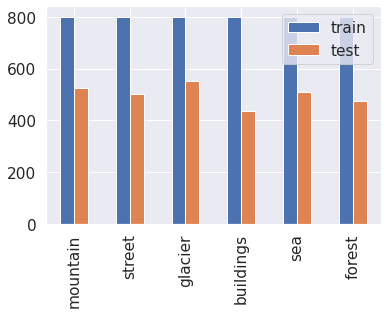

In [ ]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=classNames
            ).plot.bar()
plt.show()

Ξαναδοκιμάζουμε το CNN που κάναμε και στην αρχή, χωρίς augmentation αλλα με validation split

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
30/30 [==============================] - 92s 3s/step - loss: 1.6739 - accuracy: 0.4078 - val_loss: 1.1452 - val_accuracy: 0.5302
Epoch 2/20
30/30 [==============================] - 90s 3s/step - loss: 1.0056 - accuracy: 0.6055 - val_loss: 0.9186 - val_accuracy: 0.6250
Epoch 3/20
30/30 [==============================] - 91s 3s/step - loss: 0.8018 - accuracy: 0.7016 - val_loss: 0.8594 - val_accuracy: 0.6677
Epoch 4/20
30/30 [==============================] - 92s 3s/step - loss: 0.6945 - accuracy: 0.7510 - val_loss: 0.8698 - val_accuracy: 0.6573
Epoch 5/20
30/30 [==============================] - 91s 3s/step - loss: 0.5406 - accuracy: 0.8216 - val_loss: 0.8262 - val_accuracy: 0.6896
Epoch 6/20
30/30 [==============================] - 91s 3s/step - loss: 0.4300 - accuracy: 0.8651 - val_loss: 0.8933 - val_accuracy: 0.6802
Epoch 7/20
30/30 [==============================] - 92s 3s/step - loss: 0.3300 - accuracy: 0.8951 - val_loss: 0.7953 - val_accuracy: 0.7177
Epoch 8/20
30/30 [==

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 18s 190ms/step - loss: 1.6725 - accuracy: 0.6807
Test loss: 1.6724755764007568
Test accuracy: 0.6806666851043701


Τρέχουμε και το plot που ορίσαμε πιο πάνω

In [ ]:
#print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


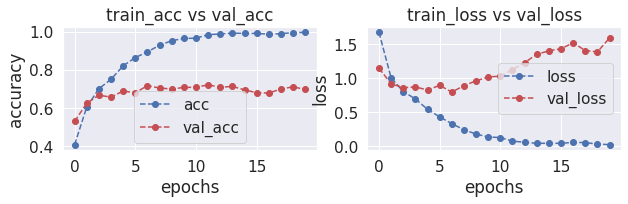

In [ ]:
plot_accuracy_loss(history)

Κάνουμε και το confusion matrix για να πάρουμε περισσότερες πληροφορίες

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

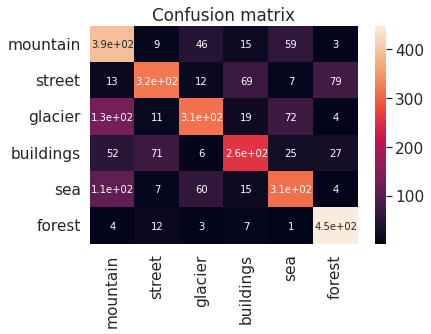

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

μικροτερο validation split και batch size = 32 αντι για 128

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_split=0.1)

Epoch 1/20
135/135 [==============================] - 118s 870ms/step - loss: 26.8852 - accuracy: 0.3090 - val_loss: 1.7310 - val_accuracy: 0.2500
Epoch 2/20
135/135 [==============================] - 99s 736ms/step - loss: 1.4860 - accuracy: 0.4377 - val_loss: 1.4614 - val_accuracy: 0.4313
Epoch 3/20
135/135 [==============================] - 98s 727ms/step - loss: 0.8974 - accuracy: 0.6773 - val_loss: 1.5231 - val_accuracy: 0.4979
Epoch 4/20
135/135 [==============================] - 99s 731ms/step - loss: 0.4172 - accuracy: 0.8569 - val_loss: 1.8098 - val_accuracy: 0.4563
Epoch 5/20
135/135 [==============================] - 99s 730ms/step - loss: 0.2404 - accuracy: 0.9231 - val_loss: 2.4506 - val_accuracy: 0.4542
Epoch 6/20
135/135 [==============================] - 98s 725ms/step - loss: 0.2335 - accuracy: 0.9331 - val_loss: 2.9863 - val_accuracy: 0.4500
Epoch 7/20
135/135 [==============================] - 99s 731ms/step - loss: 0.1216 - accuracy: 0.9586 - val_loss: 3.3311 - val_

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 17s 181ms/step - loss: 4.8514 - accuracy: 0.4410
Test loss: 4.851377487182617
Test accuracy: 0.4410000145435333


In [ ]:
plot_accuracy_loss(history)

NameError: ignored

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

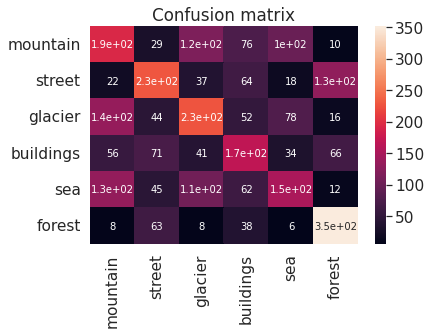

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Βάζουμε περισσότερα layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 120s 4s/step - loss: 1.5117 - accuracy: 0.3567 - val_loss: 1.2837 - val_accuracy: 0.5063
Epoch 2/20
34/34 [==============================] - 119s 3s/step - loss: 1.2105 - accuracy: 0.5164 - val_loss: 1.1699 - val_accuracy: 0.5208
Epoch 3/20
34/34 [==============================] - 119s 4s/step - loss: 1.0594 - accuracy: 0.5718 - val_loss: 0.9320 - val_accuracy: 0.6167
Epoch 4/20
34/34 [==============================] - 119s 4s/step - loss: 0.9450 - accuracy: 0.6333 - val_loss: 1.1184 - val_accuracy: 0.5521
Epoch 5/20
34/34 [==============================] - 120s 4s/step - loss: 0.9156 - accuracy: 0.6431 - val_loss: 0.9322 - val_accuracy: 0.6333
Epoch 6/20
34/34 [==============================] - 120s 4s/step - loss: 0.8442 - accuracy: 0.6863 - val_loss: 0.8555 - val_accuracy: 0.6687
Epoch 7/20
34/34 [==============================] - 120s 4s/step - loss: 0.7701 - accuracy: 0.7081 - val_loss: 0.7853 - val_accuracy: 0.6917
Epoch 8/20
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 226ms/step - loss: 0.8213 - accuracy: 0.7207
Test loss: 0.821272075176239
Test accuracy: 0.7206666469573975


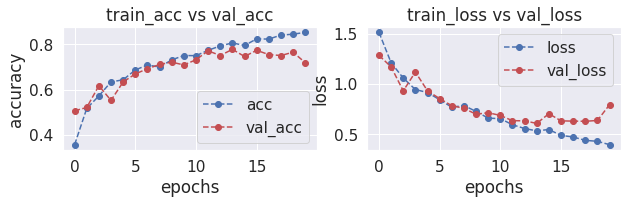

In [ ]:
plot_accuracy_loss(history)

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

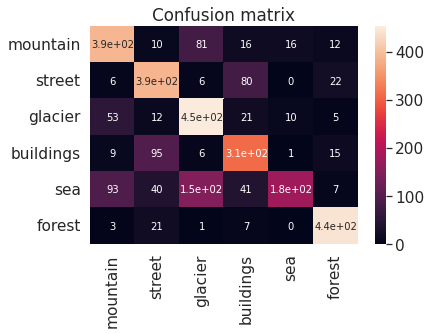

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Το training φαινεται να θελει λιγο χρονο ακομα για να ολοκληρωθει. Άρα βάζουμε περισσότερα epochs

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=35, validation_split=0.1)

Epoch 1/35
34/34 [==============================] - 126s 4s/step - loss: 1.5253 - accuracy: 0.3576 - val_loss: 1.2635 - val_accuracy: 0.4958
Epoch 2/35
34/34 [==============================] - 118s 3s/step - loss: 1.2211 - accuracy: 0.5037 - val_loss: 1.0681 - val_accuracy: 0.6083
Epoch 3/35
34/34 [==============================] - 118s 3s/step - loss: 1.0177 - accuracy: 0.5942 - val_loss: 0.9421 - val_accuracy: 0.6146
Epoch 4/35
34/34 [==============================] - 118s 3s/step - loss: 0.9184 - accuracy: 0.6440 - val_loss: 0.8551 - val_accuracy: 0.6417
Epoch 5/35
34/34 [==============================] - 119s 3s/step - loss: 0.8708 - accuracy: 0.6620 - val_loss: 0.7792 - val_accuracy: 0.6854
Epoch 6/35
34/34 [==============================] - 119s 3s/step - loss: 0.8067 - accuracy: 0.6933 - val_loss: 0.7888 - val_accuracy: 0.6938
Epoch 7/35
34/34 [==============================] - 118s 3s/step - loss: 0.7456 - accuracy: 0.7157 - val_loss: 0.6971 - val_accuracy: 0.7292
Epoch 8/35
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 223ms/step - loss: 1.1103 - accuracy: 0.7357
Test loss: 1.1103309392929077
Test accuracy: 0.7356666922569275


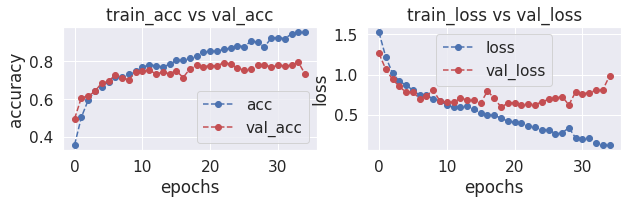

In [ ]:
plot_accuracy_loss(history)

Υπάρχει overfitting

Δοκιμή random flip horizontal στο dataset με 800 εικονες/κλαση

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 142s 4s/step - loss: 1.5266 - accuracy: 0.3493 - val_loss: 1.2963 - val_accuracy: 0.4833
Epoch 2/20
34/34 [==============================] - 120s 4s/step - loss: 1.2035 - accuracy: 0.5000 - val_loss: 1.0362 - val_accuracy: 0.5792
Epoch 3/20
34/34 [==============================] - 120s 4s/step - loss: 1.0788 - accuracy: 0.5616 - val_loss: 1.0054 - val_accuracy: 0.6062
Epoch 4/20
34/34 [==============================] - 120s 4s/step - loss: 0.9872 - accuracy: 0.6176 - val_loss: 0.8751 - val_accuracy: 0.6687
Epoch 5/20
34/34 [==============================] - 120s 4s/step - loss: 0.9177 - accuracy: 0.6419 - val_loss: 0.8744 - val_accuracy: 0.6500
Epoch 6/20
34/34 [==============================] - 120s 4s/step - loss: 0.8489 - accuracy: 0.6769 - val_loss: 0.8883 - val_accuracy: 0.6458
Epoch 7/20
34/34 [==============================] - 119s 4s/step - loss: 0.8062 - accuracy: 0.6954 - val_loss: 0.7727 - val_accuracy: 0.7021
Epoch 8/20
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 223ms/step - loss: 0.6432 - accuracy: 0.7670
Test loss: 0.643233597278595
Test accuracy: 0.7670000195503235


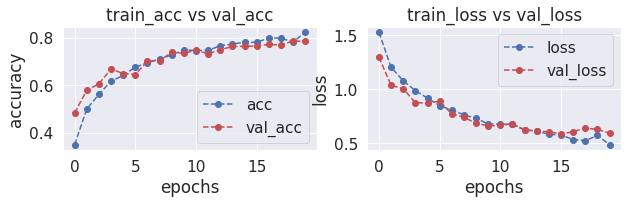

In [ ]:
plot_accuracy_loss(history)

θελει και αλλο χρονο το training

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
34/34 [==============================] - 124s 4s/step - loss: 1.5373 - accuracy: 0.3384 - val_loss: 1.3147 - val_accuracy: 0.5063
Epoch 2/40
34/34 [==============================] - 122s 4s/step - loss: 1.2070 - accuracy: 0.5046 - val_loss: 1.2744 - val_accuracy: 0.4833
Epoch 3/40
34/34 [==============================] - 121s 4s/step - loss: 1.0954 - accuracy: 0.5502 - val_loss: 1.0349 - val_accuracy: 0.5854
Epoch 4/40
34/34 [==============================] - 121s 4s/step - loss: 0.9811 - accuracy: 0.6141 - val_loss: 0.9239 - val_accuracy: 0.6521
Epoch 5/40
34/34 [==============================] - 121s 4s/step - loss: 0.9160 - accuracy: 0.6465 - val_loss: 0.8363 - val_accuracy: 0.6667
Epoch 6/40
34/34 [==============================] - 121s 4s/step - loss: 0.8578 - accuracy: 0.6718 - val_loss: 0.9482 - val_accuracy: 0.6083
Epoch 7/40
34/34 [==============================] - 121s 4s/step - loss: 0.8481 - accuracy: 0.6738 - val_loss: 0.7680 - val_accuracy: 0.6938
Epoch 8/40
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 221ms/step - loss: 0.7129 - accuracy: 0.7973
Test loss: 0.7128738760948181
Test accuracy: 0.7973333597183228


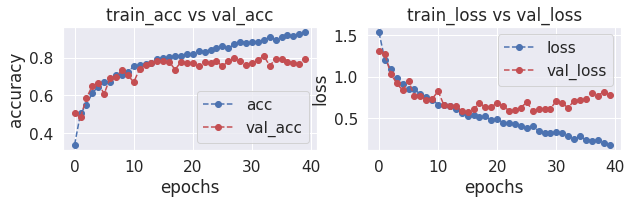

In [ ]:
plot_accuracy_loss(history)

Έχουμε overfitting

Δοκιμάζουμε dropout

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
34/34 [==============================] - 145s 4s/step - loss: 1.5588 - accuracy: 0.3199 - val_loss: 1.2852 - val_accuracy: 0.4417
Epoch 2/40
34/34 [==============================] - 123s 4s/step - loss: 1.2225 - accuracy: 0.4669 - val_loss: 1.0576 - val_accuracy: 0.5542
Epoch 3/40
34/34 [==============================] - 125s 4s/step - loss: 1.0301 - accuracy: 0.5826 - val_loss: 0.8916 - val_accuracy: 0.6271
Epoch 4/40
34/34 [==============================] - 123s 4s/step - loss: 0.9654 - accuracy: 0.6164 - val_loss: 0.9078 - val_accuracy: 0.6271
Epoch 5/40
34/34 [==============================] - 123s 4s/step - loss: 0.9019 - accuracy: 0.6498 - val_loss: 0.8188 - val_accuracy: 0.6687
Epoch 6/40
34/34 [==============================] - 123s 4s/step - loss: 0.8628 - accuracy: 0.6729 - val_loss: 0.8278 - val_accuracy: 0.6938
Epoch 7/40
34/34 [==============================] - 125s 4s/step - loss: 0.8063 - accuracy: 0.6907 - val_loss: 0.7137 - val_accuracy: 0.7271
Epoch 8/40
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 222ms/step - loss: 0.5942 - accuracy: 0.8060
Test loss: 0.5942106246948242
Test accuracy: 0.8059999942779541


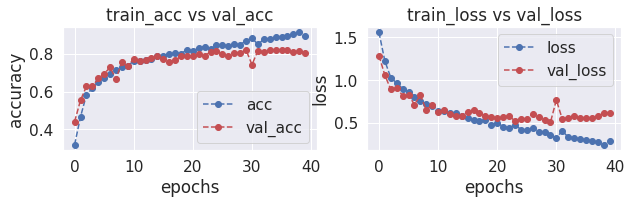

In [ ]:
plot_accuracy_loss(history)

L2 regularizer για μειωση overfitting

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
34/34 [==============================] - 153s 4s/step - loss: 3.3203 - accuracy: 0.3576 - val_loss: 2.3854 - val_accuracy: 0.4667
Epoch 2/40
34/34 [==============================] - 118s 3s/step - loss: 2.0480 - accuracy: 0.4685 - val_loss: 1.8015 - val_accuracy: 0.5125
Epoch 3/40
34/34 [==============================] - 120s 3s/step - loss: 1.6167 - accuracy: 0.5190 - val_loss: 1.4023 - val_accuracy: 0.6021
Epoch 4/40
34/34 [==============================] - 121s 4s/step - loss: 1.3786 - accuracy: 0.5806 - val_loss: 1.2492 - val_accuracy: 0.6229
Epoch 5/40
34/34 [==============================] - 118s 3s/step - loss: 1.2876 - accuracy: 0.5965 - val_loss: 1.1824 - val_accuracy: 0.6104
Epoch 6/40
34/34 [==============================] - 121s 4s/step - loss: 1.1809 - accuracy: 0.6192 - val_loss: 1.1233 - val_accuracy: 0.6479
Epoch 7/40
34/34 [==============================] - 119s 3s/step - loss: 1.0723 - accuracy: 0.6637 - val_loss: 1.0729 - val_accuracy: 0.6771
Epoch 8/40
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 22s 238ms/step - loss: 0.6630 - accuracy: 0.8003
Test loss: 0.6630209684371948
Test accuracy: 0.8003333210945129


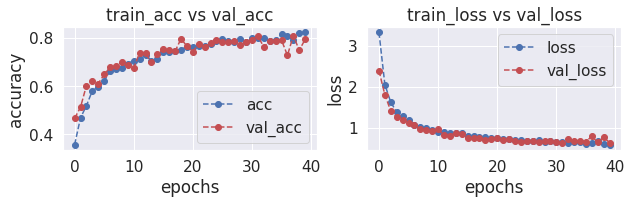

In [ ]:
plot_accuracy_loss(history)

μείωση learning rate

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=4320//128*1000, #N_TRAIN//BATCH_SIZE*1000 , εχουμε 800 εικονες/κλαση = 800*6 = 4800. Όμως 10% απο αυτες θα πανε στο validation και οχι στο training.Αρα μενουν 4320 για training.
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
optimizer = get_optimizer()

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
34/34 [==============================] - 153s 4s/step - loss: 3.3239 - accuracy: 0.3486 - val_loss: 2.3803 - val_accuracy: 0.4688
Epoch 2/40
34/34 [==============================] - 128s 4s/step - loss: 2.0121 - accuracy: 0.4808 - val_loss: 1.7277 - val_accuracy: 0.5208
Epoch 3/40
34/34 [==============================] - 129s 4s/step - loss: 1.6296 - accuracy: 0.5132 - val_loss: 1.4205 - val_accuracy: 0.5521
Epoch 4/40
34/34 [==============================] - 126s 4s/step - loss: 1.3990 - accuracy: 0.5590 - val_loss: 1.2449 - val_accuracy: 0.5917
Epoch 5/40
34/34 [==============================] - 128s 4s/step - loss: 1.2525 - accuracy: 0.5988 - val_loss: 1.2142 - val_accuracy: 0.6104
Epoch 6/40
34/34 [==============================] - 133s 4s/step - loss: 1.1959 - accuracy: 0.6116 - val_loss: 1.0720 - val_accuracy: 0.6375
Epoch 7/40
34/34 [==============================] - 129s 4s/step - loss: 1.1287 - accuracy: 0.6220 - val_loss: 1.0749 - val_accuracy: 0.6229
Epoch 8/40
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 28s 297ms/step - loss: 0.6437 - accuracy: 0.7957
Test loss: 0.6437310576438904
Test accuracy: 0.7956666946411133


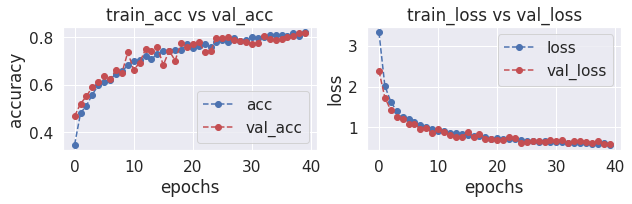

In [ ]:
plot_accuracy_loss(history)

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=4320//128*1000, #N_TRAIN//BATCH_SIZE*1000 , εχουμε 800 εικονες/κλαση = 800*6 = 4800. Όμως 10% απο αυτες θα πανε στο validation και οχι στο training.Αρα μενουν 4320 για training.
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
optimizer = get_optimizer()

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_flip_horizontal,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=80, validation_split=0.1)

Epoch 1/80
34/34 [==============================] - 158s 5s/step - loss: 3.3578 - accuracy: 0.3530 - val_loss: 2.3344 - val_accuracy: 0.4729
Epoch 2/80
34/34 [==============================] - 135s 4s/step - loss: 2.0340 - accuracy: 0.4706 - val_loss: 1.7399 - val_accuracy: 0.5083
Epoch 3/80
34/34 [==============================] - 126s 4s/step - loss: 1.5958 - accuracy: 0.5273 - val_loss: 1.4155 - val_accuracy: 0.5917
Epoch 4/80
34/34 [==============================] - 124s 4s/step - loss: 1.4003 - accuracy: 0.5646 - val_loss: 1.2388 - val_accuracy: 0.6313
Epoch 5/80
34/34 [==============================] - 136s 4s/step - loss: 1.2721 - accuracy: 0.6000 - val_loss: 1.1634 - val_accuracy: 0.6354
Epoch 6/80
34/34 [==============================] - 128s 4s/step - loss: 1.1475 - accuracy: 0.6477 - val_loss: 1.1161 - val_accuracy: 0.6396
Epoch 7/80
34/34 [==============================] - 125s 4s/step - loss: 1.0684 - accuracy: 0.6676 - val_loss: 0.9653 - val_accuracy: 0.6917
Epoch 8/80
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 25s 266ms/step - loss: 0.6668 - accuracy: 0.8197
Test loss: 0.6667914390563965
Test accuracy: 0.8196666836738586


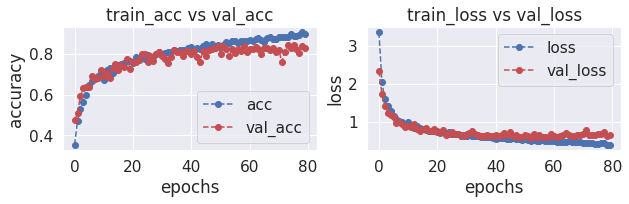

In [ ]:
plot_accuracy_loss(history)

flip, rotate, zoom στο dataset με τις 800 εικονες/κλαση

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 142s 4s/step - loss: 5.5656 - accuracy: 0.2493 - val_loss: 1.5422 - val_accuracy: 0.3438
Epoch 2/20
34/34 [==============================] - 138s 4s/step - loss: 1.3928 - accuracy: 0.4389 - val_loss: 1.2507 - val_accuracy: 0.4854
Epoch 3/20
34/34 [==============================] - 137s 4s/step - loss: 1.2193 - accuracy: 0.5088 - val_loss: 1.3325 - val_accuracy: 0.4979
Epoch 4/20
34/34 [==============================] - 137s 4s/step - loss: 1.1394 - accuracy: 0.5431 - val_loss: 1.2023 - val_accuracy: 0.5375
Epoch 5/20
34/34 [==============================] - 137s 4s/step - loss: 1.0291 - accuracy: 0.5935 - val_loss: 1.0745 - val_accuracy: 0.6083
Epoch 6/20
34/34 [==============================] - 153s 5s/step - loss: 1.0100 - accuracy: 0.6067 - val_loss: 1.0187 - val_accuracy: 0.6000
Epoch 7/20
34/34 [==============================] - 183s 5s/step - loss: 0.9492 - accuracy: 0.6319 - val_loss: 1.1140 - val_accuracy: 0.5854
Epoch 8/20
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 22s 231ms/step - loss: 0.9019 - accuracy: 0.7003
Test loss: 0.901877760887146
Test accuracy: 0.7003333568572998


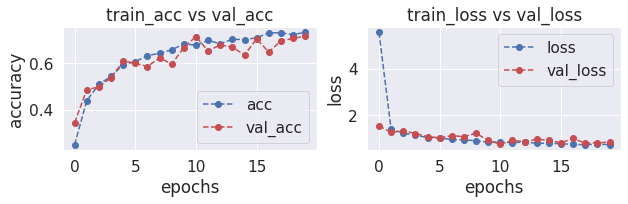

In [ ]:
plot_accuracy_loss(history)

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

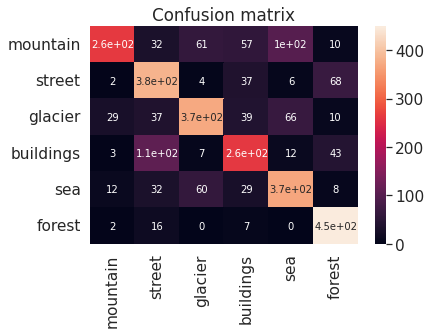

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

Θέλει και άλλο χρόνο το training

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
34/34 [==============================] - 137s 4s/step - loss: 1.5468 - accuracy: 0.3514 - val_loss: 1.2992 - val_accuracy: 0.4750
Epoch 2/40
34/34 [==============================] - 134s 4s/step - loss: 1.2587 - accuracy: 0.4796 - val_loss: 1.1528 - val_accuracy: 0.5021
Epoch 3/40
34/34 [==============================] - 133s 4s/step - loss: 1.1597 - accuracy: 0.5169 - val_loss: 1.0760 - val_accuracy: 0.5833
Epoch 4/40
34/34 [==============================] - 134s 4s/step - loss: 1.0653 - accuracy: 0.5801 - val_loss: 1.0796 - val_accuracy: 0.5667
Epoch 5/40
34/34 [==============================] - 133s 4s/step - loss: 1.0315 - accuracy: 0.5988 - val_loss: 0.9263 - val_accuracy: 0.6438
Epoch 6/40
34/34 [==============================] - 133s 4s/step - loss: 0.9606 - accuracy: 0.6248 - val_loss: 0.8996 - val_accuracy: 0.6750
Epoch 7/40
34/34 [==============================] - 134s 4s/step - loss: 0.8911 - accuracy: 0.6595 - val_loss: 0.8521 - val_accuracy: 0.6854
Epoch 8/40
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 223ms/step - loss: 0.7014 - accuracy: 0.7517
Test loss: 0.7014366984367371
Test accuracy: 0.7516666650772095


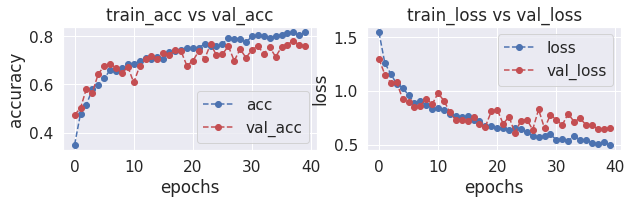

In [ ]:
plot_accuracy_loss(history)

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=60, validation_split=0.1)

Epoch 1/60
34/34 [==============================] - 155s 4s/step - loss: 1.4945 - accuracy: 0.3683 - val_loss: 1.5959 - val_accuracy: 0.3625
Epoch 2/60
34/34 [==============================] - 134s 4s/step - loss: 1.2979 - accuracy: 0.4697 - val_loss: 1.3026 - val_accuracy: 0.4833
Epoch 3/60
34/34 [==============================] - 132s 4s/step - loss: 1.1551 - accuracy: 0.5303 - val_loss: 1.1768 - val_accuracy: 0.5375
Epoch 4/60
34/34 [==============================] - 135s 4s/step - loss: 1.0721 - accuracy: 0.5810 - val_loss: 1.0869 - val_accuracy: 0.5854
Epoch 5/60
34/34 [==============================] - 136s 4s/step - loss: 0.9862 - accuracy: 0.6118 - val_loss: 0.9792 - val_accuracy: 0.5875
Epoch 6/60
34/34 [==============================] - 132s 4s/step - loss: 0.9797 - accuracy: 0.6255 - val_loss: 1.0107 - val_accuracy: 0.6313
Epoch 7/60
34/34 [==============================] - 134s 4s/step - loss: 0.9237 - accuracy: 0.6449 - val_loss: 0.9444 - val_accuracy: 0.6417
Epoch 8/60
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 24s 255ms/step - loss: 0.7883 - accuracy: 0.7503
Test loss: 0.7883240580558777
Test accuracy: 0.750333309173584


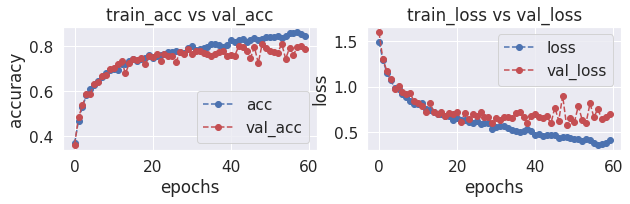

In [ ]:
plot_accuracy_loss(history)

Βάζουμε και dropout

In [ ]:
model = tf.keras.Sequential([
    augmentation_flip_rotate_zoom,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
34/34 [==============================] - 140s 4s/step - loss: 2.9248 - accuracy: 0.2984 - val_loss: 1.5727 - val_accuracy: 0.3688
Epoch 2/20
34/34 [==============================] - 139s 4s/step - loss: 1.3120 - accuracy: 0.4470 - val_loss: 1.5647 - val_accuracy: 0.4354
Epoch 3/20
34/34 [==============================] - 138s 4s/step - loss: 1.2232 - accuracy: 0.4924 - val_loss: 1.1204 - val_accuracy: 0.5292
Epoch 4/20
34/34 [==============================] - 136s 4s/step - loss: 1.1246 - accuracy: 0.5528 - val_loss: 1.1457 - val_accuracy: 0.5458
Epoch 5/20
34/34 [==============================] - 136s 4s/step - loss: 1.0820 - accuracy: 0.5718 - val_loss: 1.0751 - val_accuracy: 0.5667
Epoch 6/20
34/34 [==============================] - 139s 4s/step - loss: 1.0250 - accuracy: 0.5975 - val_loss: 1.0166 - val_accuracy: 0.6062
Epoch 7/20
34/34 [==============================] - 139s 4s/step - loss: 1.0203 - accuracy: 0.6157 - val_loss: 1.2071 - val_accuracy: 0.5375
Epoch 8/20
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 21s 228ms/step - loss: 0.8714 - accuracy: 0.7080
Test loss: 0.871444821357727
Test accuracy: 0.7080000042915344


random combination (flip,rotate,zoom,translate,contrast)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split=0.1)

Epoch 1/30
34/34 [==============================] - 160s 5s/step - loss: 1.5761 - accuracy: 0.3394 - val_loss: 1.4144 - val_accuracy: 0.4104
Epoch 2/30
34/34 [==============================] - 146s 4s/step - loss: 1.3078 - accuracy: 0.4734 - val_loss: 1.6925 - val_accuracy: 0.4000
Epoch 3/30
34/34 [==============================] - 147s 4s/step - loss: 1.2062 - accuracy: 0.5111 - val_loss: 1.5338 - val_accuracy: 0.4458
Epoch 4/30
34/34 [==============================] - 146s 4s/step - loss: 1.1224 - accuracy: 0.5433 - val_loss: 1.4229 - val_accuracy: 0.5021
Epoch 5/30
34/34 [==============================] - 146s 4s/step - loss: 1.0500 - accuracy: 0.5866 - val_loss: 0.9973 - val_accuracy: 0.6271
Epoch 6/30
34/34 [==============================] - 146s 4s/step - loss: 0.9991 - accuracy: 0.6123 - val_loss: 1.0764 - val_accuracy: 0.5875
Epoch 7/30
34/34 [==============================] - 147s 4s/step - loss: 0.9777 - accuracy: 0.6162 - val_loss: 1.0970 - val_accuracy: 0.5979
Epoch 8/30
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 25s 260ms/step - loss: 0.8466 - accuracy: 0.7090
Test loss: 0.8466485738754272
Test accuracy: 0.7089999914169312


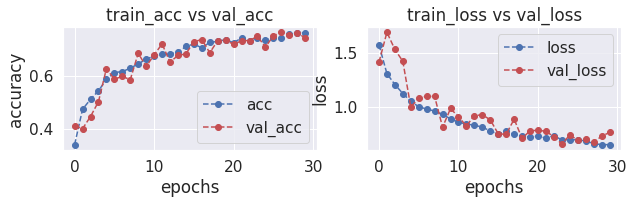

In [ ]:
plot_accuracy_loss(history)

Περισσότερες εποχές

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
34/34 [==============================] - 146s 4s/step - loss: 1.6181 - accuracy: 0.3005 - val_loss: 1.4430 - val_accuracy: 0.4187
Epoch 2/40
34/34 [==============================] - 145s 4s/step - loss: 1.3250 - accuracy: 0.4558 - val_loss: 1.4226 - val_accuracy: 0.4521
Epoch 3/40
34/34 [==============================] - 145s 4s/step - loss: 1.2204 - accuracy: 0.5014 - val_loss: 1.3167 - val_accuracy: 0.4896
Epoch 4/40
34/34 [==============================] - 145s 4s/step - loss: 1.1203 - accuracy: 0.5491 - val_loss: 1.0345 - val_accuracy: 0.5708
Epoch 5/40
34/34 [==============================] - 145s 4s/step - loss: 1.0838 - accuracy: 0.5741 - val_loss: 1.0387 - val_accuracy: 0.6000
Epoch 6/40
34/34 [==============================] - 144s 4s/step - loss: 1.0218 - accuracy: 0.5898 - val_loss: 1.1701 - val_accuracy: 0.5458
Epoch 7/40
34/34 [==============================] - 144s 4s/step - loss: 1.0212 - accuracy: 0.6007 - val_loss: 0.9589 - val_accuracy: 0.6062
Epoch 8/40
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 25s 263ms/step - loss: 0.7904 - accuracy: 0.7197
Test loss: 0.7903522253036499
Test accuracy: 0.7196666598320007


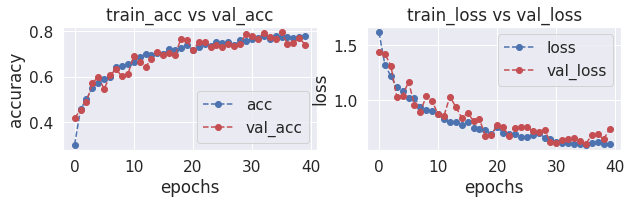

In [ ]:
plot_accuracy_loss(history)

Δεν παει καλα το training στο τέλος

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=4320//128*1000, #N_TRAIN//BATCH_SIZE*1000 , εχουμε 800 εικονες/κλαση = 800*6 = 4800. Όμως 10% απο αυτες θα πανε στο validation και οχι στο training.Αρα μενουν 4320 για training.
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [ ]:
optimizer = get_optimizer()

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=40, validation_split=0.1)

Epoch 1/40
34/34 [==============================] - 139s 4s/step - loss: 1.5479 - accuracy: 0.3613 - val_loss: 1.4347 - val_accuracy: 0.4062
Epoch 2/40
34/34 [==============================] - 135s 4s/step - loss: 1.3073 - accuracy: 0.4530 - val_loss: 1.1303 - val_accuracy: 0.5583
Epoch 3/40
34/34 [==============================] - 137s 4s/step - loss: 1.1720 - accuracy: 0.5134 - val_loss: 1.1675 - val_accuracy: 0.5417
Epoch 4/40
34/34 [==============================] - 135s 4s/step - loss: 1.1070 - accuracy: 0.5528 - val_loss: 1.0022 - val_accuracy: 0.6229
Epoch 5/40
34/34 [==============================] - 136s 4s/step - loss: 1.0527 - accuracy: 0.5891 - val_loss: 1.3225 - val_accuracy: 0.5104
Epoch 6/40
34/34 [==============================] - 136s 4s/step - loss: 1.0162 - accuracy: 0.5972 - val_loss: 1.1707 - val_accuracy: 0.5333
Epoch 7/40
34/34 [==============================] - 140s 4s/step - loss: 0.9885 - accuracy: 0.6090 - val_loss: 1.0603 - val_accuracy: 0.5854
Epoch 8/40
34

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 22s 232ms/step - loss: 0.6087 - accuracy: 0.7903
Test loss: 0.6086544394493103
Test accuracy: 0.7903333306312561


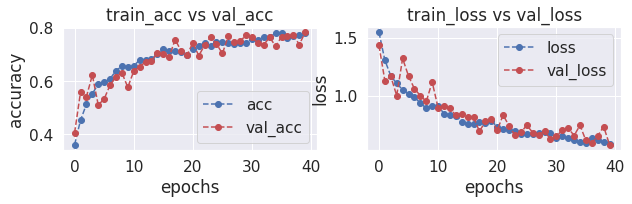

In [ ]:
plot_accuracy_loss(history)

den exei treksi to kato

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=100, validation_split=0.1)

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
plot_accuracy_loss(history)

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
model = tf.keras.Sequential([
    augmentation_random_combination,
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, batch_size=128, epochs=40, callbacks=[callback])

Epoch 1/40
38/38 [==============================] - 155s 4s/step - loss: 1.5475 - accuracy: 0.3481 - lr: 0.0010
Epoch 2/40
38/38 [==============================] - 157s 4s/step - loss: 1.2741 - accuracy: 0.4806 - lr: 0.0010
Epoch 3/40
38/38 [==============================] - 153s 4s/step - loss: 1.1547 - accuracy: 0.5296 - lr: 0.0010
Epoch 4/40
38/38 [==============================] - 152s 4s/step - loss: 1.0990 - accuracy: 0.5535 - lr: 0.0010
Epoch 5/40
38/38 [==============================] - 151s 4s/step - loss: 1.0529 - accuracy: 0.5765 - lr: 0.0010
Epoch 6/40
38/38 [==============================] - 152s 4s/step - loss: 0.9937 - accuracy: 0.6098 - lr: 0.0010
Epoch 7/40
38/38 [==============================] - 151s 4s/step - loss: 0.9599 - accuracy: 0.6254 - lr: 0.0010
Epoch 8/40
38/38 [==============================] - 152s 4s/step - loss: 0.9196 - accuracy: 0.6473 - lr: 0.0010
Epoch 9/40
38/38 [==============================] - 152s 4s/step - loss: 0.8943 - accuracy: 0.6687 - lr:

In [ ]:
score = model.evaluate(test_images, test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

94/94 [==============================] - 22s 232ms/step - loss: 0.7104 - accuracy: 0.7400
Test loss: 0.7104313373565674
Test accuracy: 0.7400000095367432


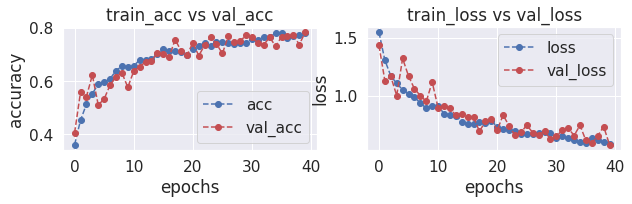

In [ ]:
plot_accuracy_loss(history)

tf.image τεχνικες στο dataset με 800 εικονες/κλαση

Με τον τρόπο που θα γίνει load το dataset δεν μπορούμε να καλέσουμε τη validation_split όταν κάνουμε μετά model.fit. Άρα φτιάχνουμε το validation set τώρα

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset2/seg_train/seg_train',
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(150, 150)
)

Found 4800 files belonging to 6 classes.
Using 4320 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset2/seg_train/seg_train',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(150, 150)
)

Found 4800 files belonging to 6 classes.
Using 480 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset2/seg_test/seg_test',
  seed=123,
  image_size=(150, 150)
)

Found 3000 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


αλλαγη hue

In [ ]:
def augment(image_label, seed):
  image, label = image_label
  #image, label = resize_and_rescale(image, label)
  #image = tf.image.resize_with_crop_or_pad(image, IMG_SIZE + 6, IMG_SIZE + 6)
  # Make a new seed.
  new_seed = tf.random.experimental.stateless_split(seed, num=1)[0, :]
  # Random crop back to the original size.
  image = tf.image.stateless_random_hue(
    image, 0.1, new_seed
  )
  # Random brightness.
  #image = tf.image.stateless_random_brightness(
      #image, max_delta=0.5, seed=new_seed)
  #image = tf.clip_by_value(image, 0, 1)
  return image, label

In [ ]:
rng = tf.random.Generator.from_seed(123, alg='philox')

In [ ]:
def f(x, y):
  seed = rng.make_seeds(2)[0]
  image, label = augment((x, y), seed)
  return image, label

In [ ]:
train_ds.map(f)

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, batch_size=128, epochs=20, validation_data=val_ds)

Epoch 1/20
 13/135 [=>............................] - ETA: 18:33 - loss: 6.4029 - accuracy: 0.2091

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(test_ds)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Ο πάνω κώδικας τρέχει, αλλά κάνει περίπου 30 λεπτά για να τελειώσει μια εποχή.

Transfer learning

Προεπεξεργασία

In [ ]:
train_images = tf.keras.applications.resnet50.preprocess_input(train_images.astype('float32'))
test_images = tf.keras.applications.resnet50.preprocess_input(test_images.astype('float32'))

In [ ]:
resnet1 = tf.keras.applications.resnet50.ResNet50(input_shape=(224, 224, 3),  include_top=False, weights='imagenet')

In [ ]:
resnet1.trainable = True
input = tf.keras.Input(shape=train_images[0].shape)
x = tf.keras.layers.Resizing(224, 224)(input)
x = resnet1(x)
# Οι δημιουργοί του ResNet προτείνουν global average pooling στο τελευταίο
# συνελικτικό επίπεδο.
x = tf.keras.layers.GlobalAveragePooling2D()(x)
out = tf.keras.layers.Dense(6, activation='softmax')(x)
model1 = tf.keras.Model(input, outputs=[out])

In [ ]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])
model1.fit(train_images, train_labels, batch_size=64, epochs=5)

Epoch 1/5
75/75 [==============================] - 2886s 38s/step - loss: 0.3571 - accuracy: 0.8715
Epoch 2/5
75/75 [==============================] - 2818s 38s/step - loss: 0.0546 - accuracy: 0.9821
Epoch 3/5
75/75 [==============================] - 2865s 38s/step - loss: 0.0203 - accuracy: 0.9952
Epoch 4/5
75/75 [==============================] - 2851s 38s/step - loss: 0.0089 - accuracy: 0.9985
Epoch 5/5
75/75 [==============================] - 2887s 39s/step - loss: 0.0034 - accuracy: 0.9996


In [ ]:
score = model1.evaluate(test_images, test_labels)
print(score)

 7/94 [=>............................] - ETA: 8:58 - loss: 0.2859 - accuracy: 0.9062

KeyboardInterrupt: ignored

In [ ]:
test_images = test_images * 255.0

In [ ]:
!mkdir -p saved_model
model1.save('saved_model/my_model3')

INFO:tensorflow:Assets written to: saved_model/my_model3/assets


In [ ]:
!zip  "/modeltest.zip" "/content/saved_model"

  adding: content/saved_model/ (stored 0%)


In [ ]:
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])
model1.fit(train_images, train_labels, batch_size=64, epochs=5)

score = model1.evaluate(test_images, test_labels)
print(score)

Epoch 1/5
75/75 [==============================] - 3412s 45s/step - loss: 0.3624 - accuracy: 0.8746
Epoch 2/5
75/75 [==============================] - 3396s 45s/step - loss: 0.0517 - accuracy: 0.9844
Epoch 3/5
75/75 [==============================] - 3396s 45s/step - loss: 0.0125 - accuracy: 0.9973
Epoch 4/5
75/75 [==============================] - 3340s 45s/step - loss: 0.0063 - accuracy: 0.9992
Epoch 5/5
94/94 [==============================] - 457s 5s/step - loss: 0.3303 - accuracy: 0.9167
[0.33032289147377014, 0.9166666865348816]


In [ ]:
predictions = model1.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1)

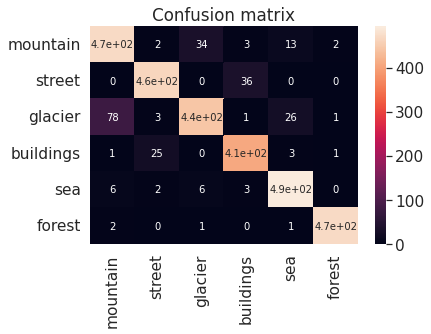

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True,
           annot_kws={"size": 10},
           xticklabels=class_names,
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 64)       

In [ ]:
import cv2
image_path = r'/content/drive/MyDrive/dataset/test/seg_test/forest/20056.jpg'
image =cv2.imread(image_path)
image = image / 255
image = cv2.resize(image, (150, 150))
image = np.expand_dims(image, axis=0)
pred_class = model.predict(image)
print(pred_class)

[[0.0017128  0.22429499 0.02643888 0.00261184 0.15765023 0.58729124]]


In [ ]:
result = np.where(pred_class == np.amax(pred_class))
print(result[1])
print(type(result))

[5]
<class 'tuple'>


In [ ]:
if result[1] == 5:
  print('forest')
elif result[1] == 4:
  print('sea')
elif result[1] == 3:
  print('building')
elif result[1] == 2:
  print('glacier')
else:
  print('street')

forest


In [ ]:
!cp -r /content/saved_model /content/drive/MyDrive/saved_model

load το transfer learning μοντέλο

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/my_model3')

In [ ]:
score = new_model.evaluate(test_images, test_labels)
print(score)

94/94 [==============================] - 462s 5s/step - loss: 0.5729 - accuracy: 0.8253
[0.5728522539138794, 0.8253333568572998]


Παραδείγματα εικόνων που το μοντέλο βρίσκει λάθος κλαση

In [ ]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

In [ ]:
predictions = new_model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

In [ ]:
test_images = test_images / 255.0 #gia na fanoun sosta oi eikones meta

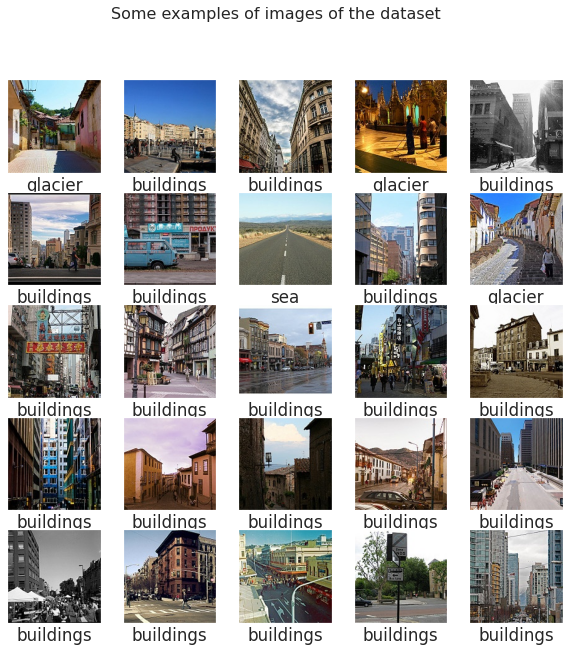

In [ ]:
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

random erasing

In [ ]:
def random_erase_np(img, probability = 0.5, sl = 0.02, sh = 0.4, r1 = 0.3):
    height = 150
    width = 150
    channel = 3
    area = width * height
    for attempt in range(100):
        target_area = np.random.uniform(sl, sh) * area
        aspect_ratio = np.random.uniform(r1, 1/r1)

        h = int(np.round(np.sqrt(target_area * aspect_ratio)))
        w = int(np.round(np.sqrt(target_area / aspect_ratio)))

        if w < width and h < height:
            x1 = np.random.randint(0, height - h)
            y1 = np.random.randint(0, width - w)
            img[x1:x1+h, y1:y1+w, :] = np.random.uniform(0, 255, (h, w, channel))
            return img

    return img

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:

def random_erase_np_augm(img, label, probability = 0.5, sl = 0.02, sh = 0.4, r1 = 0.3):
    #tf.config.run_functions_eagerly(True)
    #img, label = image_label
    height = 150
    width = 150
    channel = 3
    area = width * height
    with sess.as_default():
      img = img.eval()
    for attempt in range(100):
        target_area = np.random.uniform(sl, sh) * area
        aspect_ratio = np.random.uniform(r1, 1/r1)

        h = int(np.round(np.sqrt(target_area * aspect_ratio)))
        w = int(np.round(np.sqrt(target_area / aspect_ratio)))

        if w < width and h < height:
            x1 = np.random.randint(0, height - h)
            y1 = np.random.randint(0, width - w)
            img[x1:x1+h, y1:y1+w, :] = np.random.uniform(0, 255, (h, w, channel))
            img = tf.convert_to_tensor(img, dtype=tf.float32)
            return img, label


In [ ]:
def random_erasing(img, label, probability = 0.5, sl = 0.02, sh = 0.4, r1 = 0.3):
    '''
    img is a 3-D variable (ex: tf.Variable(image, validate_shape=False) ) and  HWC order
    '''
    #img, label = img_label
    # HWC order
    height = tf.shape(img)[0]
    width = tf.shape(img)[1]
    channel = tf.shape(img)[2]
    area = tf.cast(width*height, tf.float32)

    erase_area_low_bound = tf.cast(tf.round(tf.sqrt(sl * area * r1)), tf.int32)
    erase_area_up_bound = tf.cast(tf.round(tf.sqrt((sh * area) / r1)), tf.int32)
    h_upper_bound = tf.minimum(erase_area_up_bound, height)
    w_upper_bound = tf.minimum(erase_area_up_bound, width)

    h = tf.random.uniform([], erase_area_low_bound, h_upper_bound, tf.int32)
    w = tf.random.uniform([], erase_area_low_bound, w_upper_bound, tf.int32)

    x1 = tf.random.uniform([], 0, height+1 - h, tf.int32)
    y1 = tf.random.uniform([], 0, width+1 - w, tf.int32)

    erase_area = tf.cast(tf.random.uniform([h, w, channel], 0, 255, tf.int32), tf.uint8)

    #erasing_img = img[x1:x1+h, y1:y1+w, :].assign(erase_area)
    erasing_img = tf.tensor_scatter_nd_update(img, [x1+h, y1+w], [erase_area])

    return tf.cond(tf.random.uniform([], 0, 1) > probability, lambda: img, lambda: erasing_img), label

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset2/seg_train/seg_train/buildings/11796.jpg')
print(img.shape[2])

3


In [ ]:
img = random_erase_np(img)

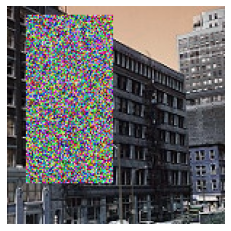

In [ ]:
plt.axis('off')
plt.imshow(img)

θα γινει map αρα κανουμε load τις εικονες αλλιως

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset2/seg_train/seg_train',
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(150, 150)
)

Found 4800 files belonging to 6 classes.
Using 4320 files for training.


In [ ]:
for i in train_ds:
  img,label = i
  #img = img.numpy()
  print(img)
  break

tf.Tensor(
[[[[125. 163. 200.]
   [125. 163. 200.]
   [124. 162. 199.]
   ...
   [104. 140. 192.]
   [104. 140. 192.]
   [103. 139. 191.]]

  [[125. 163. 200.]
   [125. 163. 200.]
   [124. 162. 199.]
   ...
   [104. 140. 192.]
   [103. 139. 191.]
   [103. 139. 191.]]

  [[126. 164. 201.]
   [128. 166. 203.]
   [128. 166. 202.]
   ...
   [104. 140. 192.]
   [103. 139. 191.]
   [103. 139. 191.]]

  ...

  [[ 36.  53.  83.]
   [ 24.  39.  68.]
   [ 28.  35.  63.]
   ...
   [ 40.  53.  61.]
   [ 41.  58.  68.]
   [ 40.  58.  68.]]

  [[ 12.  31.  61.]
   [ 15.  32.  60.]
   [ 43.  52.  81.]
   ...
   [  9.  11.   8.]
   [  9.  15.  13.]
   [  4.  13.  12.]]

  [[ 19.  40.  69.]
   [ 23.  40.  68.]
   [ 44.  55.  83.]
   ...
   [183. 180. 171.]
   [186. 187. 181.]
   [182. 185. 178.]]]


 [[[ 31.  21.   0.]
   [216. 206. 181.]
   [234. 220. 194.]
   ...
   [133. 146. 136.]
   [104. 115. 107.]
   [116. 125. 120.]]

  [[ 38.  27.   5.]
   [222. 212. 187.]
   [239. 224. 201.]
   ...
   [109. 1

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset2/seg_train/seg_train',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(150, 150)
)

Found 4800 files belonging to 6 classes.
Using 480 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  directory='/content/drive/MyDrive/dataset2/seg_test/seg_test',
  seed=123,
  image_size=(150, 150)
)

Found 3000 files belonging to 6 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
#rng = tf.random.Generator.from_seed(123, alg='philox')

In [ ]:
#def f(x, y):
  #seed = rng.make_seeds(2)[0]
  #image, label = random_erase_np_augm((x, y),probability = 0.5, sl = 0.02, sh = 0.4, r1 = 0.3)
  #return image, label

In [ ]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(random_erase_np_augm)
    .batch(128)
    .prefetch(tf.data.AUTOTUNE)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


NameError: ignored

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
def test(img):


In [ ]:
tf.executing_eagerly()

True